<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra Saavedra </em><br>

</div>

# **Visualización de la Información: Tarea N° 4**
*24 de Octubre de 2024*

**Nombre Estudiante(s)**: `Jaime Castillo Castro - Kurt Castro Ortega - Sofía Vits Contreras - Erick Cisterna Contreras`


**Dataset:** World Happiness Report- 2024

**Fuente:** https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from flexitext import flexitext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Arrow
from matplotlib.patches import Circle
from matplotlib import patches
from matplotlib.collections import LineCollection

### **I. GENERALIDADES**


#### **1. Descripción general del dataset**

El **World Happiness Report 2024** es un conjunto de datos que evalúa el bienestar de los países a nivel global. Utiliza varios indicadores que intentan capturar la felicidad de los ciudadanos a través de múltiples dimensiones económicas, sociales y psicológicas.

#### **2. Columnas Dataset Principal**


1. **Country name**: El nombre del país evaluado.
2. **year**: El año en el que se tomaron las mediciones.
3. **Life Ladder**: Una medida de la felicidad subjetiva de los ciudadanos (en una escala de 0 a 10), conocida como el "escalera de la vida", donde las personas evalúan su vida actual.
4. **Log GDP per capita**: El PIB per cápita en una escala logarítmica. Representa la riqueza económica promedio de los ciudadanos en el país.
5. **Social support**: Un índice que mide el nivel de apoyo social, es decir, si las personas tienen alguien en quien confiar en momentos de necesidad.
6. **Healthy life expectancy at birth**: La esperanza de vida saludable al nacer, que mide cuántos años se espera que una persona viva en buena salud.
7. **Freedom to make life choices**: Índice que mide la percepción de las personas sobre su libertad para tomar decisiones importantes en su vida.
8. **Generosity**: Índice de generosidad, basado en la cantidad de donaciones y ayuda mutua dentro del país.
9. **Perceptions of corruption**: Mide la percepción pública sobre los niveles de corrupción en las instituciones del gobierno y los negocios.
10. **Positive affect**: La cantidad de experiencias positivas (como la risa y el disfrute) que una persona experimenta.
11. **Negative affect**: Mide el grado de experiencias negativas (como tristeza y enojo) que las personas experimentan.


#### **3. Columnas dataset secundario**


12. **Continent**: Esta columna proviene desde un dataset adicional que permite agrupar a los países por continente (por ejemplo, Asia, Europa, África, etc.).

#### **4. Propósito del dataset**

El objetivo de este dataset es proporcionar una medida comprensiva de la felicidad global. Los indicadores económicos como el PIB per cápita y la esperanza de vida saludable se combinan con variables sociales y emocionales, como el apoyo social y la percepción de corrupción, para crear una imagen más completa del bienestar de los ciudadanos en cada país.

### **II. DESARROLLO**

#### **Paso 1: Carga de datos**

A continuación, se carga la base de datos World-happiness-report-updated_2024 y adicionalmente se carga una base de datos de los paises por continente, la cual tiene por finalidad realizar un cruce de información y agregar una columna calculada en la base de datos inicial.

In [40]:
# Cargar el dataset principal
ruta = "../Data/World-happiness-report-updated_2024.csv"
df = pd.read_csv(ruta, encoding='latin1')

# Cargar el dataset de países y continentes
ruta_paises = "../Data/Countries by continents.csv"
df_paises_continente = pd.read_csv(ruta_paises, sep=';')

# los nombres de las columnas coincidan para la combinacion
df_paises_continente = df_paises_continente.rename(columns={'Country': 'Country name'})

# Combinar ambos datasets usando la columna 'Country name'
df_merged = pd.merge(df, df_paises_continente, on='Country name', how='left')

# Verificar las primeras filas para asegurarse de que el continente fue agregado
print(df_merged.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect Continent  

#### **Paso 2: Análisis exploratorio**

In [41]:
# Mostrar el tamaño del dataframe
df_merged.shape

(2363, 12)

In [42]:
# Separar variables numéricas
numerical_variables = df_merged.dtypes[df_merged.dtypes != 'object'].index
print('El número de variables numéricas es: ', len(numerical_variables))
print('Las variables numéricas son:', numerical_variables)

El número de variables numéricas es:  10
Las variables numéricas son: Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [43]:
# Separar variables categóricas
categorical_variables = df_merged.dtypes[df_merged.dtypes == 'object'].index
print('El número de variables categóricas es', len(categorical_variables))
print('Las variables categóricas son:', categorical_variables)

El número de variables categóricas es 2
Las variables categóricas son: Index(['Country name', 'Continent'], dtype='object')


In [44]:
# Mostrar datos estadísticos de variables numéricas
df_merged.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [45]:
# Mostrar datos estadísticos de variables categóricas
df_merged.describe(include=object)

,Country name,Continent
count,2363,2363
unique,165,6
top,Lebanon,Europe
freq,18,718


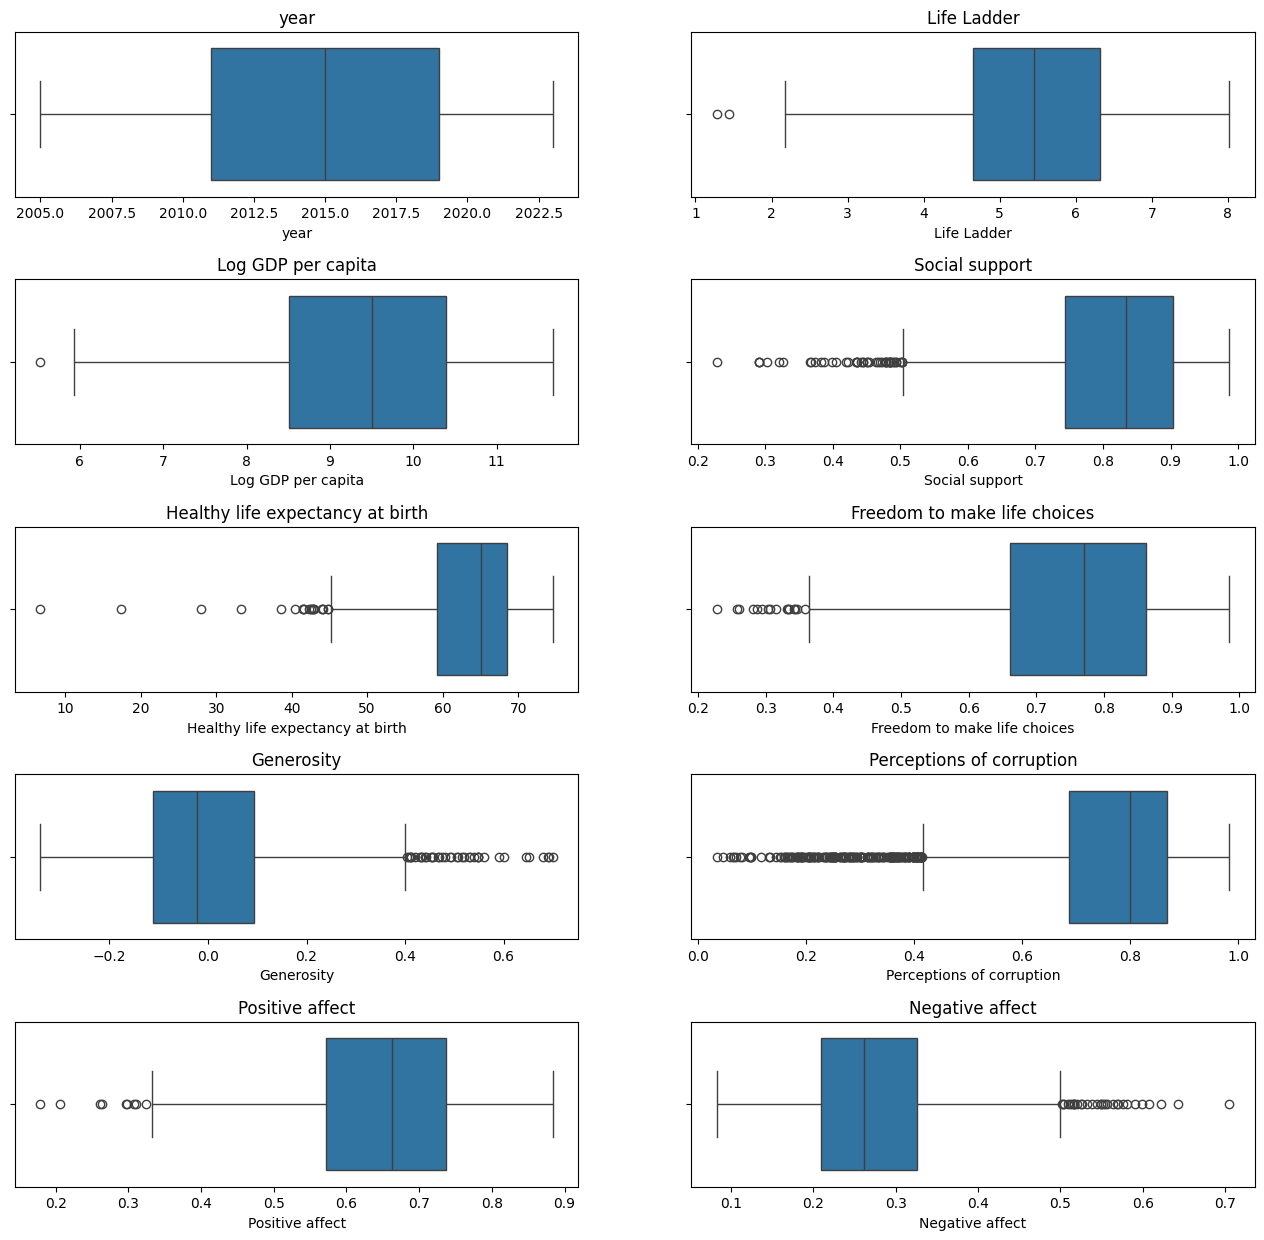

In [46]:
# Revisión de existencia de Outliers en variables numéricas
cols_num = ['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

# Crear la figura con 5 filas y 2 columnas
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 15))  # Tamaño ajustado para mejor visualización
fig.subplots_adjust(hspace=0.5)  # Ajuste del espacio vertical entre gráficos

# Recorrer las variables numéricas y graficar cada boxplot
for i, col in enumerate(cols_num):
    row = i // 2  # Índice de la fila
    col_idx = i % 2  # Índice de la columna
    sns.boxplot(x=col, data=df_merged, ax=ax[row, col_idx])  # Graficar en el eje correspondiente
    ax[row, col_idx].set_title(col)  # Establecer título de cada boxplot

# Mostrar el gráfico
plt.show()

Análisis de las diferentes variables del dataset a través de boxplots. Esto, para analizar outliers, y tener un panorama general de como se distribuyen los datos dentro de cada una de las variables:

1. **Year (Año)**:

- El rango de los datos va de 2005 a 2022, donde se encuentran distribuidos los datos mayormente en los años 2011 a 2018. No se ven outliers.

2. **Life Ladder (Escalera de vida)**:

- Mide la percepción de las personas sobre su bienestar general.
La mediana está alrededor de 5.5, lo que significa que, en general, las personas evalúan su felicidad en ese nivel en una escala de 0 a 10.
Hay algunos datos atípicos en el extremo izquierdo, lo que sugiere que en algunos países las personas se sienten mucho menos felices que en otros países.

3. **Log GDP per capita (Logaritmo del PIB per cápita)**:

- Representa el bienestar económico. Un PIB per cápita más alto generalmente está asociado con mayor bienestar.
La mediana está alrededor de 9.5, lo que sugiere que la mayoría de los países tienen un nivel económico moderado.
No hay muchos datos atípicos, lo que indica que la mayoría de los países tienen valores similares en esta medida.

4. **Social support (Apoyo social)**:

- Mide la percepción de las personas sobre el apoyo que reciben de su entorno.
La mediana está en 0.8, lo que sugiere que la mayoría de las personas sienten que tienen un buen apoyo social.
Los outliers en el extremo izquierdo, sugiere que personas de algunos países sienten que tienen muy poco apoyo social.

5. **Healthy life expectancy at birth (Esperanza de vida saludable al nacer)**:

- Representa cuántos años una persona puede esperar vivir con buena salud.
La mediana está alrededor de 60 años, con algunos valores atípicos más bajos. Lo que indica que en general, las personas estiman llegar con buena salud hasta un poco antes de ser adultos mayores.

6. **Freedom to make life choices (Libertad para tomar decisiones)**:

- Mide la percepción de las personas sobre su libertad para tomar decisiones.
La mediana está alrededor de 0.75, lo que sugiere que la mayoría de las personas sienten que tienen una cantidad considerable de libertad para tomar decisiones importantes.
Hay datos atípicos en el extremo izquierdo, lo que significa que algunas personas sienten muy poca libertad.

7. **Generosity (Generosidad)**:

- Mide la disposición de las personas a ser generosas.
La mediana es cercana a cero, lo que indica que, en promedio, la generosidad no es un factor relevante.
Existen muchos valores atípicos al lado derecho del boxplot, lo que significa que algunos países son mucho más generosos que otros.

8. **Perceptions of corruption (Percepciones de corrupción)**:

- Mide cómo perciben las personas los niveles de corrupción en sus países.
La mediana está cerca de 0.75, lo que indica que muchas personas consideran que la corrupción es un problema moderado o serio.
Existen muchos valores atípicos en la parte izquierda, lo que sugiere que algunos países perciben niveles muy bajos de corrupción.

9. **Positive affect (Afecto positivo)**:

- Mide el grado de emociones positivas que experimentan las personas, como felicidad o risas.
La mediana está alrededor de 0.7, lo que indica que la mayoría de las personas experimentan emociones positivas regularmente.
Existen algunos valores atípicos en la parte inferior, lo que sugiere que algunas personas experimentan niveles muy bajos de emociones positivas.

10. **Negative affect (Afecto negativo)**:

- Mide el grado de emociones negativas, como preocupación o tristeza.
La mediana está alrededor de 0.2 y 0.3, lo que indica que la mayoría de las personas no experimentan emociones negativas de manera frecuente.
Hay muchos valores atípicos en la parte superior, lo que indica que algunas personas experimentan emociones negativas con mayor frecuencia que en otros países.

In [47]:
# Análisis de la existencia de valores nulos
valores_nulos = df_merged.isnull().sum()
print("Valores faltantes iniciales por columna:\n", valores_nulos)

Valores faltantes iniciales por columna:
 Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
Continent                             0
dtype: int64


#### **Paso 4: Limpieza de datos**
1. El proceso de limpieza de datos comenzará utilizando el criterio de eliminar aquellas filas (países) donde la cantidad de valores faltantes superen el 50%.

In [48]:
# Eliminar filas con más del 50% de valores faltantes

param = df.shape[1] * 0.5

# Identificar las filas que tienen más del 50% de valores faltantes

filas_elim = df[df.isnull().sum(axis=1) > param]

# Mostrar las filas que tienen más del 50% de valores faltantes
print(filas_elim)
df_cleaned = df_merged.dropna(thresh=param)

              Country name  year  Life Ladder  Log GDP per capita  \
135                Bahrain  2014        6.165              10.802   
1123                Kuwait  2014        6.180              10.926   
1721                 Qatar  2015        6.375              11.532   
2197  United Arab Emirates  2014        6.540              11.072   
2307               Vietnam  2017        5.175               9.111   

      Social support  Healthy life expectancy at birth  \
135              NaN                             65.96   
1123             NaN                             70.00   
1721             NaN                             66.40   
2197             NaN                             65.34   
2307             NaN                             65.10   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
135                            NaN         NaN                        NaN   
1123                           NaN         NaN                        NaN   
1721 

2. Para los valores faltantes que aún existen en el dataframe, serán reemplazados con la mediana respectiva. Para esto, se considerarán 2 criterios de imputación de datos; el primero nos indica que se reemplazarán los datos vacíos con la mediana del país respectivo. Por otro lado, el segundo nos indica que en caso de no encontrar datos de la columna respectiva y tampoco del país, se completará con la mediana del continente.

In [49]:
# Función para rellenar los valores faltantes por país y continente
def rellenar_faltantes(df, column):
    # Rellenar primero con la mediana por país
    df[column] = df.groupby('Country name')[column].transform(lambda x: x.fillna(x.median()))

    # Rellenar los que aún estén faltantes con la mediana por continente
    df[column] = df.groupby('Continent')[column].transform(lambda x: x.fillna(x.median()))

    return df

# Columnas consideradas para la  imputacion de datos
cols_a_rellenar = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                   'Positive affect', 'Negative affect']

# Aplicar la función a todas las columnas numéricas con valores faltantes
for column in cols_a_rellenar:
    df_cleaned = rellenar_faltantes(df_cleaned, column)

3. A continuación, se verifica la existencia de valores duplicados y en el caso de existir, se procede a su eliminación.

In [50]:
# Verificar y eliminar filas duplicadas
filas_duplicadas = df_cleaned.duplicated().sum()
print(f"Número de filas duplicadas: {filas_duplicadas}")

# Eliminar duplicados
df_cleaned = df_cleaned.drop_duplicates()

Número de filas duplicadas: 0


4. Se verifica la existencia de valores nulos luego de haber aplicado los pasos anteriores.

In [51]:
# Revisar valores faltantes después de la limpieza
valores_nulos_post = df_cleaned.isnull().sum()
print("Valores faltantes después de la limpieza:\n", valores_nulos_post)

Valores faltantes después de la limpieza:
 Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Continent                           0
dtype: int64


#### **Paso 5: Almacenamiento de dataframe limpio**

In [52]:
# Guardar el dataset limpio
df_cleaned.to_csv("../Data/dataset_limpio.csv", index=False)
df_heatmap = df_cleaned.copy() # Este dataframe se utilizará más adelante para la creación de visualizaciones

#### **Paso 6: Carga de datos limpios**

A continuación, se carga el dataset limpio generado en la etapa `N° 1 de Exploración y Limpieza`.

In [53]:
# Cargar el dataset principal
ruta = "../Data/dataset_limpio.csv"
df_cleaned = pd.read_csv(ruta, encoding='latin1')
df_cleaned.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continent
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,Asia


#### **Paso 7: Aplicación de Feature Engineering**

1. **GDP_social_interaction**:
   - **Descripción**: Representa la interacción entre el PIB per cápita (Log GDP per capita) y el soporte social. Mide cómo la combinación de la riqueza económica y el apoyo social puede influir en otros indicadores de bienestar.


2. **Life_health_interaction**:
   - **Descripción**: Muestra la interacción entre la expectativa de vida al nacer y el índice de satisfacción con la vida (Life Ladder). Esta variable combina la salud con el bienestar subjetivo para entender su relación.

3. **Support_GDP_ratio**:
   - **Descripción**: Proporción entre el soporte social y el PIB per cápita. Evalúa el nivel de soporte social en relación con la riqueza económica de cada país o región.

4. **Generosity_corruption_ratio**:
   - **Descripción**: Proporción entre la generosidad y la percepción de la corrupción. Permite analizar si los niveles de generosidad en un país están relacionados con la percepción de la corrupción.

5. **GDP_category**:
   - **Descripción**: Categorización del PIB per cápita en tres niveles: "Bajo", "Medio" y "Alto". Facilita la comparación entre países con diferentes niveles de riqueza.

6. **Life_Ladder_category**:
   - **Descripción**: Categorización del índice de satisfacción con la vida (Life Ladder) en tres niveles: "Bajo", "Medio" y "Alto". Facilita el análisis de la satisfacción con la vida entre diferentes grupos.

In [54]:
# 1. Interacciones entre variables numéricas
# Crear la interacción entre "Log GDP per capita" y "Social support"
df_cleaned['GDP_social_interaction'] = df_cleaned['Log GDP per capita'] * df_cleaned['Social support']

# Crear la interacción entre "Healthy life expectancy at birth" y "Life Ladder"
df_cleaned['Life_health_interaction'] = df_cleaned['Healthy life expectancy at birth'] * df_cleaned['Life Ladder']

# 2. Ratios o proporciones
# Crear una columna de proporción entre "Social support" y "Log GDP per capita"
df_cleaned['Support_GDP_ratio'] = df_cleaned['Social support'] / df_cleaned['Log GDP per capita']

# Crear una columna de proporción entre "Generosity" y "Perceptions of corruption"
df_cleaned['Generosity_corruption_ratio'] = df_cleaned['Generosity'] / df_cleaned['Perceptions of corruption']

# 3. Discretización o binning de variables
# Crear categorías para "Log GDP per capita" en niveles "Bajo", "Medio" y "Alto"
df_cleaned['GDP_category'] = pd.cut(df_cleaned['Log GDP per capita'],
                                    bins=[5, 8, 10, 12],
                                    labels=["Bajo", "Medio", "Alto"])

# Crear categorías para "Life Ladder" en niveles "Bajo", "Medio" y "Alto"
df_cleaned['Life_Ladder_category'] = pd.cut(df_cleaned['Life Ladder'],
                                            bins=[0, 4, 6, 10],
                                            labels=["Bajo", "Medio", "Alto"])

# Guardar el conjunto de datos con las nuevas columnas en un archivo CSV (opcional)
df_cleaned.to_csv('../Data/dataset_con_nuevas_columnas.csv', index=False)

# Mostrar las primeras filas del dataset con las nuevas columnas
df_cleaned.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continent,GDP_social_interaction,Life_health_interaction,Support_GDP_ratio,Generosity_corruption_ratio,GDP_category,Life_Ladder_category
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,Asia,3.314850,188.0620,0.061361,0.185941,Bajo,Bajo
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,Asia,4.144968,223.6216,0.073512,0.220000,Bajo,Medio
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,Asia,4.103946,243.1338,0.070791,0.166902,Bajo,Medio
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,Asia,3.949701,196.9648,0.068724,0.218878,Bajo,Bajo
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,Asia,3.991381,195.5811,0.068007,0.301546,Bajo,Bajo


#### **Paso 8: Normalización de datos**

Se realiza el proceso de normalización de las columnas numéricas del dataframe, excluyendo la columna "year" mediante el método **Min-Max Scaling** de `sklearn`, que ajusta los valores al rango 0-1. La decisión de aplicar la normalización en este conjunto de datos se basa en las diferencias significativas en la escala y rango de las variables numéricas. Aglunas variables como el "Log GDP per capita" y "Life Ladder", tienen rangos muchos más amplios que otras, como "Generosity" o "Perceptions of corruption".

In [55]:
# Inicializar el Min-Max Scaler
scaler = MinMaxScaler()

# Excluir la columna "year" de las columnas numéricas a normalizar
columnas_normalizadas = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Aplicar la normalización solo a las columnas seleccionadas
normalizada_data = scaler.fit_transform(df_cleaned[columnas_normalizadas])

# Convertir los datos normalizados
normalizada_df = pd.DataFrame(normalizada_data, columns=columnas_normalizadas)

# Mantener las columnas no numéricas y la columna "year"
columnas_no_numericas = df_cleaned.select_dtypes(exclude=['float64', 'int64']).columns

# Combinar el DataFrame de columnas no numéricas con el DataFrame normalizado
df_normalized = pd.concat([df_cleaned[columnas_no_numericas], df_cleaned['year'], normalizada_df], axis=1)

# Guardar el conjunto de datos normalizado en un archivo CSV (opcional)
df_normalized.to_csv('../Data/dataset_normalizado.csv', index=False)

# Mostrar el dataset normalizado
print(df_normalized.head())

  Country name Continent GDP_category Life_Ladder_category  year  Life Ladder  \
0  Afghanistan      Asia         Bajo                 Bajo  2008     0.362570   
1  Afghanistan      Asia         Bajo                Medio  2009     0.463194   
2  Afghanistan      Asia         Bajo                Medio  2010     0.516028   
3  Afghanistan      Asia         Bajo                 Bajo  2011     0.378599   
4  Afghanistan      Asia         Bajo                 Bajo  2012     0.371327   

   Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            0.296471        0.293808                          0.644962   
1            0.322329        0.426877                          0.649381   
2            0.339405        0.409750                          0.653801   
3            0.334038        0.386034                          0.658220   
4            0.347048        0.386034                          0.662640   

   Freedom to make life choices  Generosity  Perceptions of co

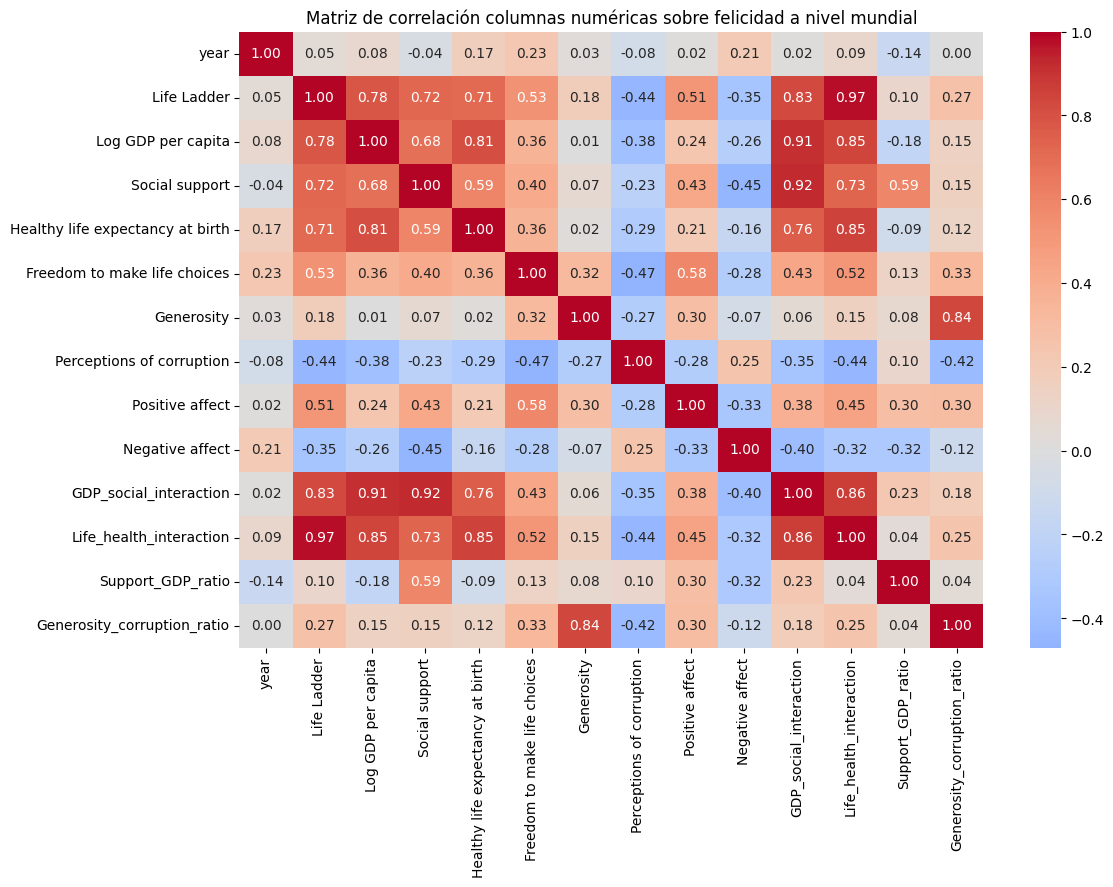

In [56]:
# Se muestra la matriz de correlación de los valores numéricos del dataset
correlation_matrix = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación columnas numéricas sobre felicidad a nivel mundial")
plt.show()

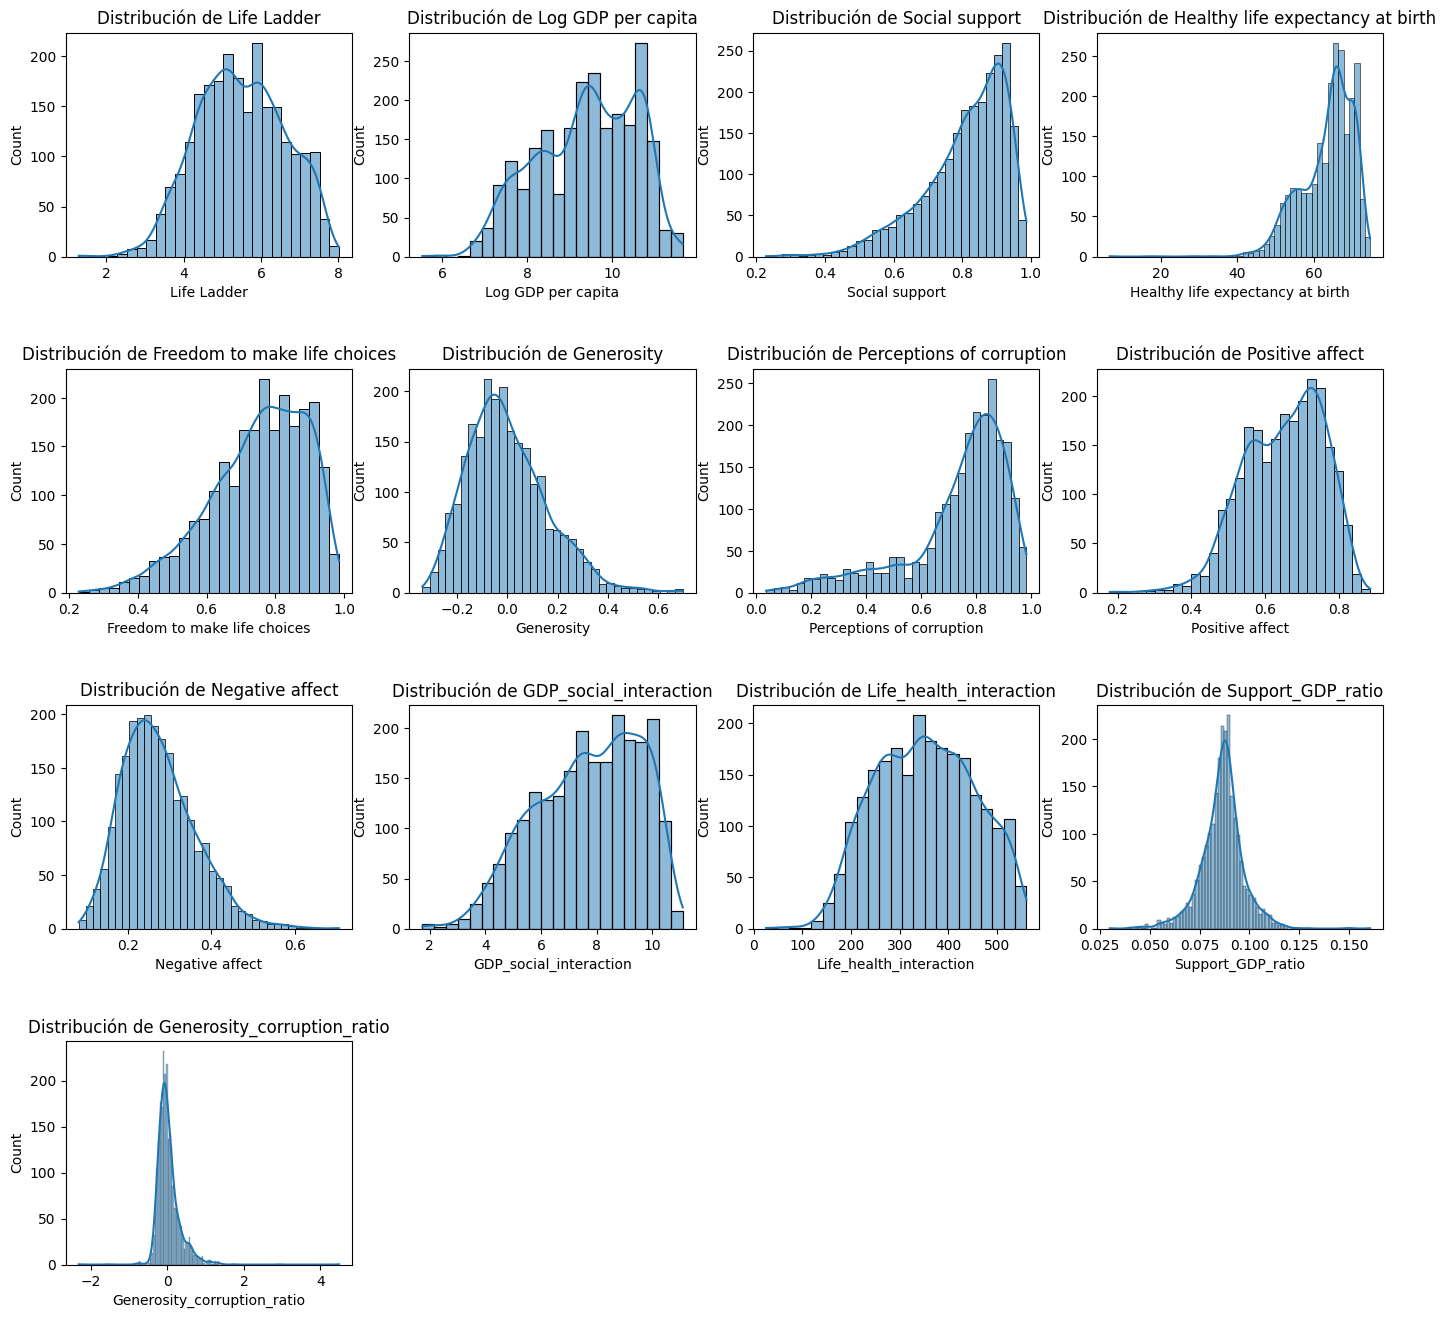

In [57]:
### SE MUESTRA DISTRIBUCIÓN DE VARIABLES ANTES DE NORMALIZACIÓN ####

# Seleccionar todas las columnas numéricas, excluyendo "year"
cols_num = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Establecer el número de filas y columnas (7 filas, 2 columnas)
nrows = 4
ncols = 4

# Crear la figura con 4 filas y 4 columnas
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17, 4 * nrows))
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio entre gráficos

# Recorrer las variables numéricas y graficar cada histograma
for i, col in enumerate(cols_num):
    row = i // ncols  # Índice de la fila
    col_idx = i % ncols  # Índice de la columna
    sns.histplot(df_cleaned[col], kde=True, ax=ax[row, col_idx])  # Histogramas con curva de densidad (KDE)
    ax[row, col_idx].set_title(f'Distribución de {col}')

# Eliminar cualquier gráfico vacío si hay menos de 14 variables
if len(cols_num) < nrows * ncols:
    for i in range(len(cols_num), nrows * ncols):
        fig.delaxes(ax.flatten()[i])

# Mostrar el gráfico
plt.show()

              year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2363.000000     2363.000000   
mean   2014.763860     0.623711            0.629233        0.766016   
std       5.059436     0.167041            0.187451        0.159535   
min    2005.000000     0.000000            0.000000        0.000000   
25%    2011.000000     0.499555            0.483900        0.679842   
50%    2015.000000     0.618581            0.645796        0.799736   
75%    2019.000000     0.748367            0.791267        0.890646   
max    2023.000000     1.000000            1.000000        1.000000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2363.000000                   2363.000000   
mean                           0.836026                      0.690885   
std                            0.100035                      0.183713   
min                            0.000000                      0.00000

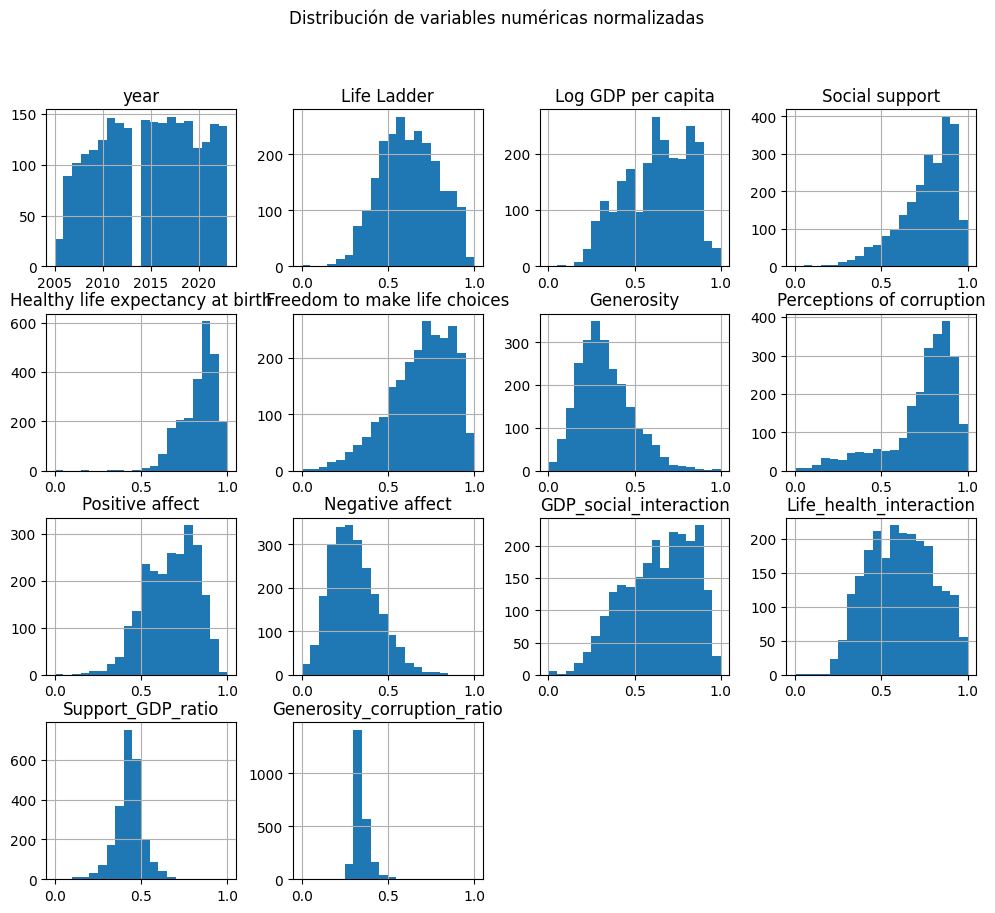

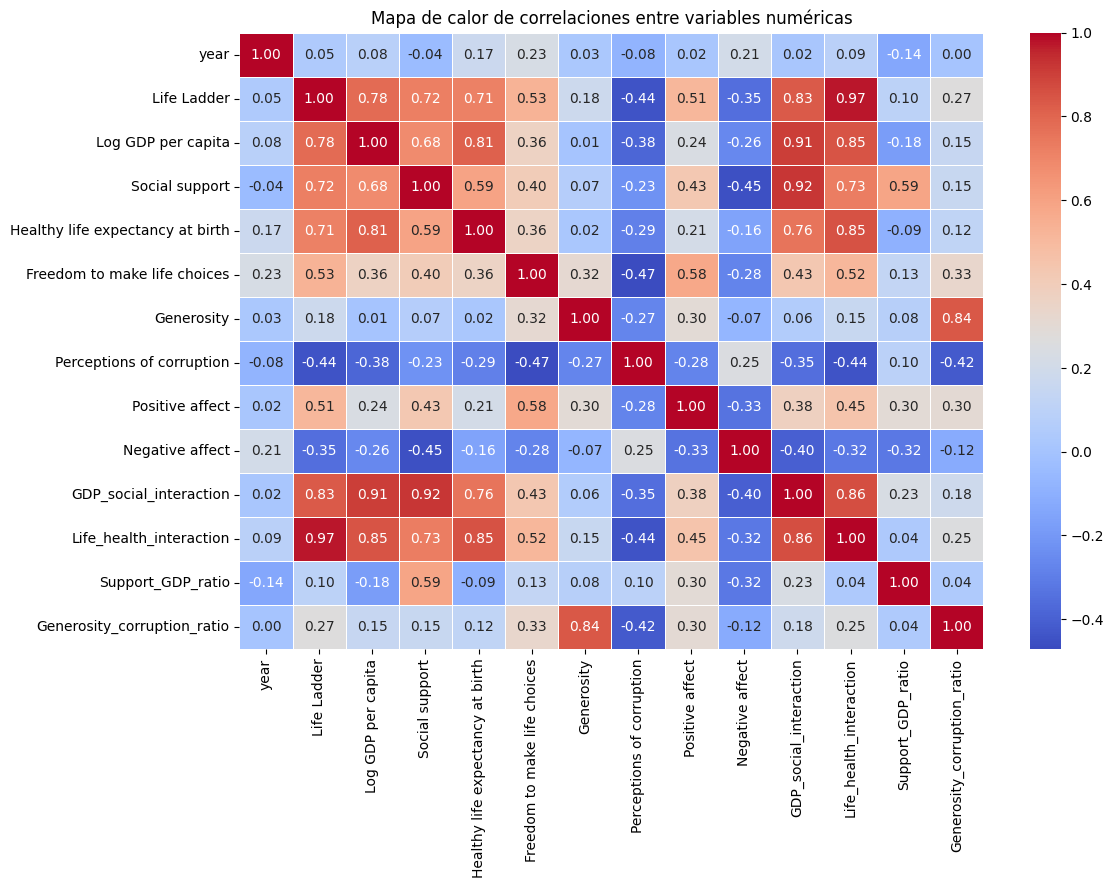

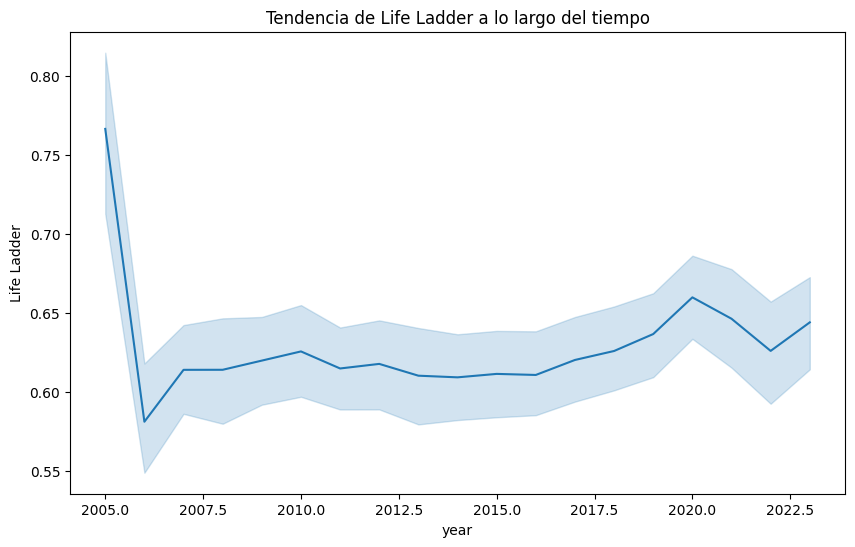

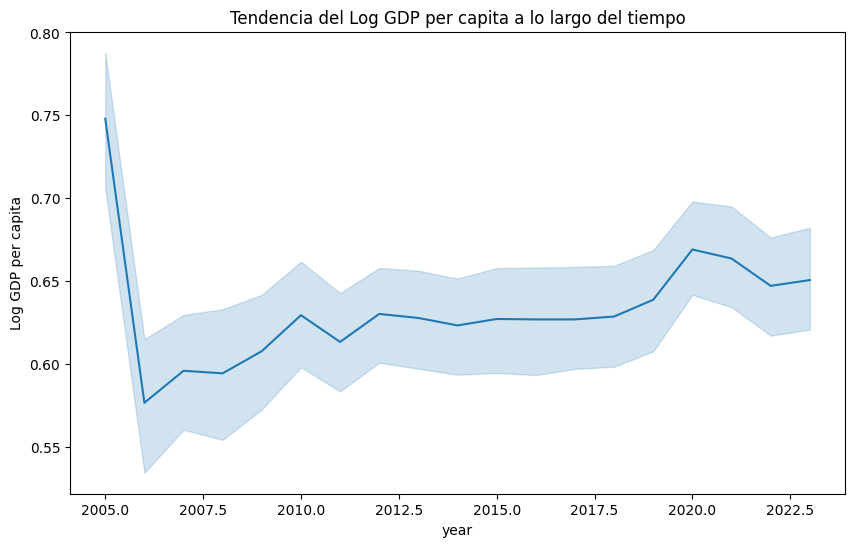

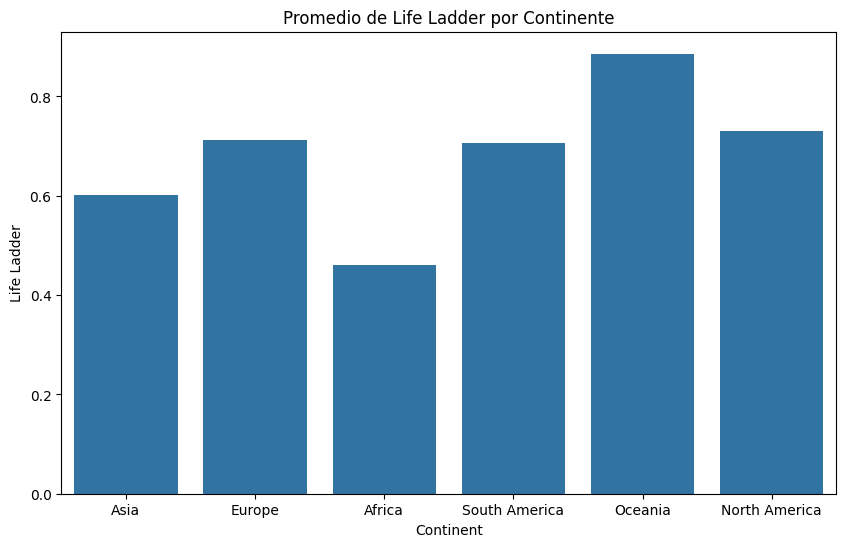

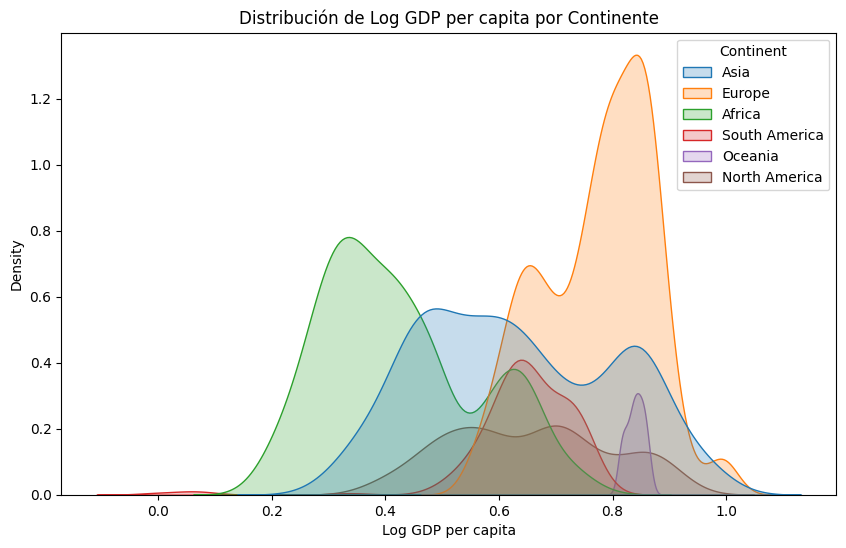

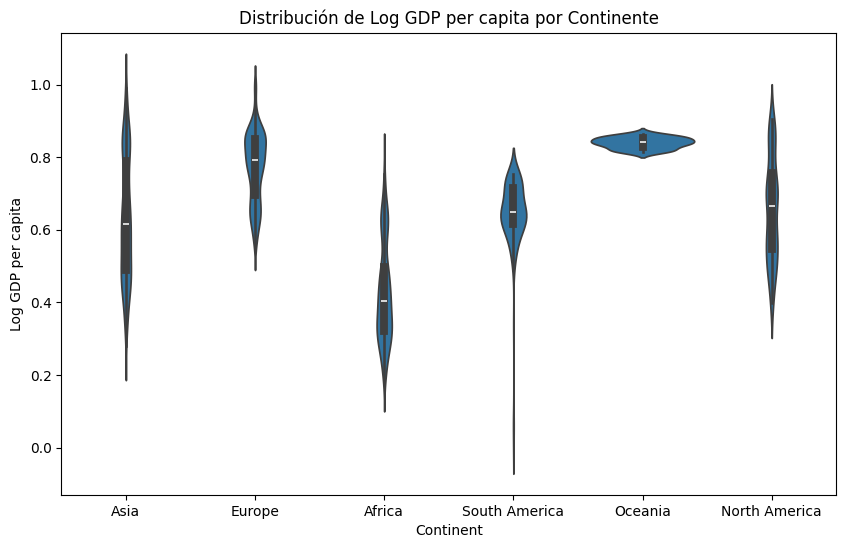

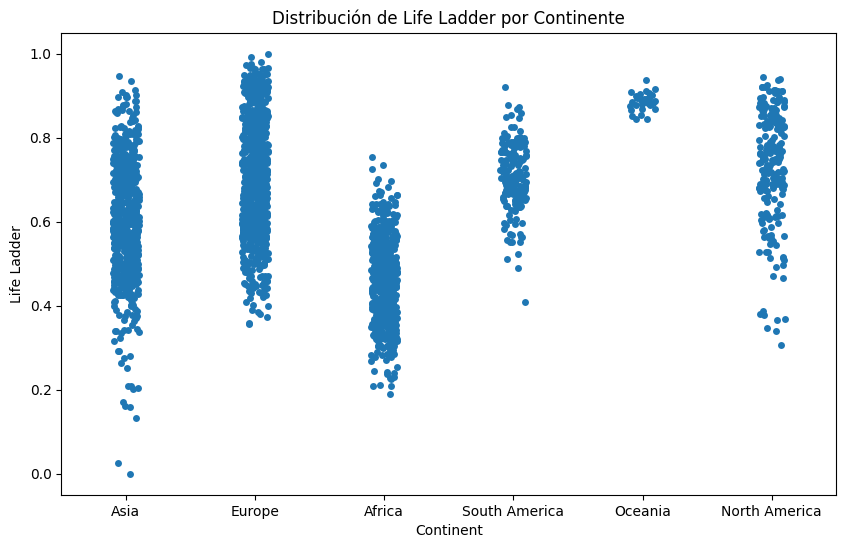

In [58]:
### SE MUESTRA UNA SERIE DE GRÁFICOS PARA VISUALIZAR EL COMPORTAMIENTO DE LAS VARIABLES ####

df = df_normalized

# 1. Estadísticas descriptivas
print(df.describe())

# 2. Histograma de las variables numéricas
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribución de variables numéricas normalizadas', size=12)
plt.show()

# 3. Mapa de calor para visualizar las correlaciones entre las variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

# 4. Análisis temporal: Cambios de "Life Ladder" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Life Ladder')
plt.title('Tendencia de Life Ladder a lo largo del tiempo')
plt.show()

# 5. Análisis temporal: Cambios de "Log GDP per capita" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Log GDP per capita')

plt.title('Tendencia del Log GDP per capita a lo largo del tiempo')
plt.show()

# 6. Gráfico de barras para el promedio de Life Ladder por continente
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Life Ladder', data=df, estimator='mean', ci=None)
plt.title('Promedio de Life Ladder por Continente')
plt.show()

# 7. Gráfico de densidad de Log GDP per capita por continente
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Log GDP per capita', hue='Continent', fill=True)
plt.title('Distribución de Log GDP per capita por Continente')
plt.show()

# 8. Gráfico de violín para Log GDP per capita por continente
plt.figure(figsize=(10, 6))
sns.violinplot(x='Continent', y='Log GDP per capita', data=df)
plt.title('Distribución de Log GDP per capita por Continente')
plt.show()

# 9. Gráfico de dispersión categórico (strip plot) para Life Ladder por continente
plt.figure(figsize=(10, 6))
sns.stripplot(x='Continent', y='Life Ladder', data=df, jitter=True)
plt.title('Distribución de Life Ladder por Continente')
plt.show()

#### **Paso 9: Estandarización de datos**

Se implementará el proceso de Estandarización dado que esto será útil cuando se necesite que los datos estén centrados en la media y con una desviación estándar uniforme. Generalmente, se utiliza en modelos estadísticos y algoritmos que asumen que los datos tienen una distribución aproximadamente normal, como regresiones lineales, análisis de componentes pricipales (PCA), y algunos modelos de máquinas de soporte vectorial (SVM).

In [59]:
# Seleccionar las columnas numéricas excluyendo "year"
cols_num = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las columnas numéricas
df_standarized = df_cleaned.copy()  # Hacer una copia del DataFrame
df_standarized[cols_num] = scaler.fit_transform(df_cleaned[cols_num])

# Guardar el dataset estandarizado en un nuevo archivo CSV
df_standarized.to_csv('../Data/dataset_estandarizado.csv', index=False)

# Mostrar las primeras filas del dataset estandarizado
print(df_standarized.head())

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008    -1.563665           -1.775565       -2.960521   
1  Afghanistan  2009    -0.961150           -1.637591       -2.126237   
2  Afghanistan  2010    -0.644785           -1.546477       -2.233620   
3  Afghanistan  2011    -1.467689           -1.575113       -2.382304   
4  Afghanistan  2012    -1.511233           -1.505692       -2.382304   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         -1.910373                     -0.237337    1.023819   
1                         -1.866183                     -0.517830    1.167252   
2                         -1.821994                     -1.086007    0.736954   
3                         -1.777805                     -1.833988    0.998875   
4                         -1.733615                     -1.582264    1.460353   

   Perceptions of corruption  Positive affect  Negative affect Continent  

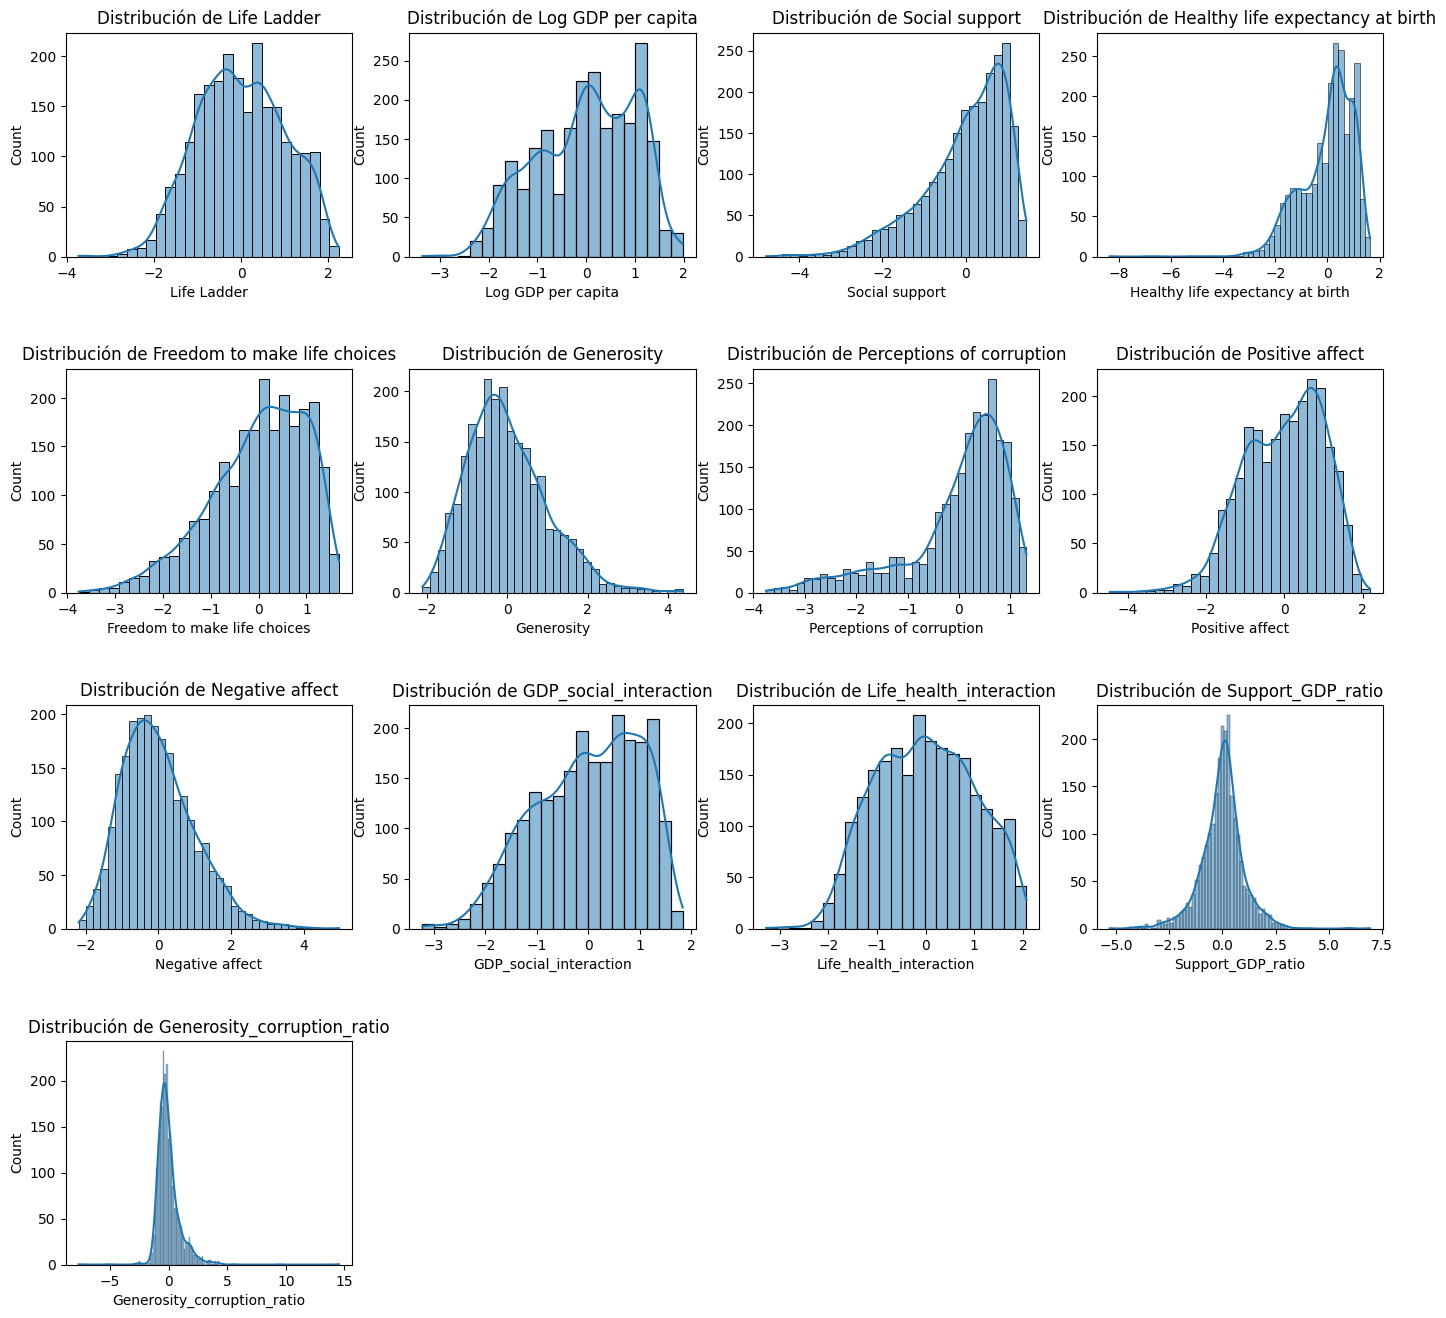

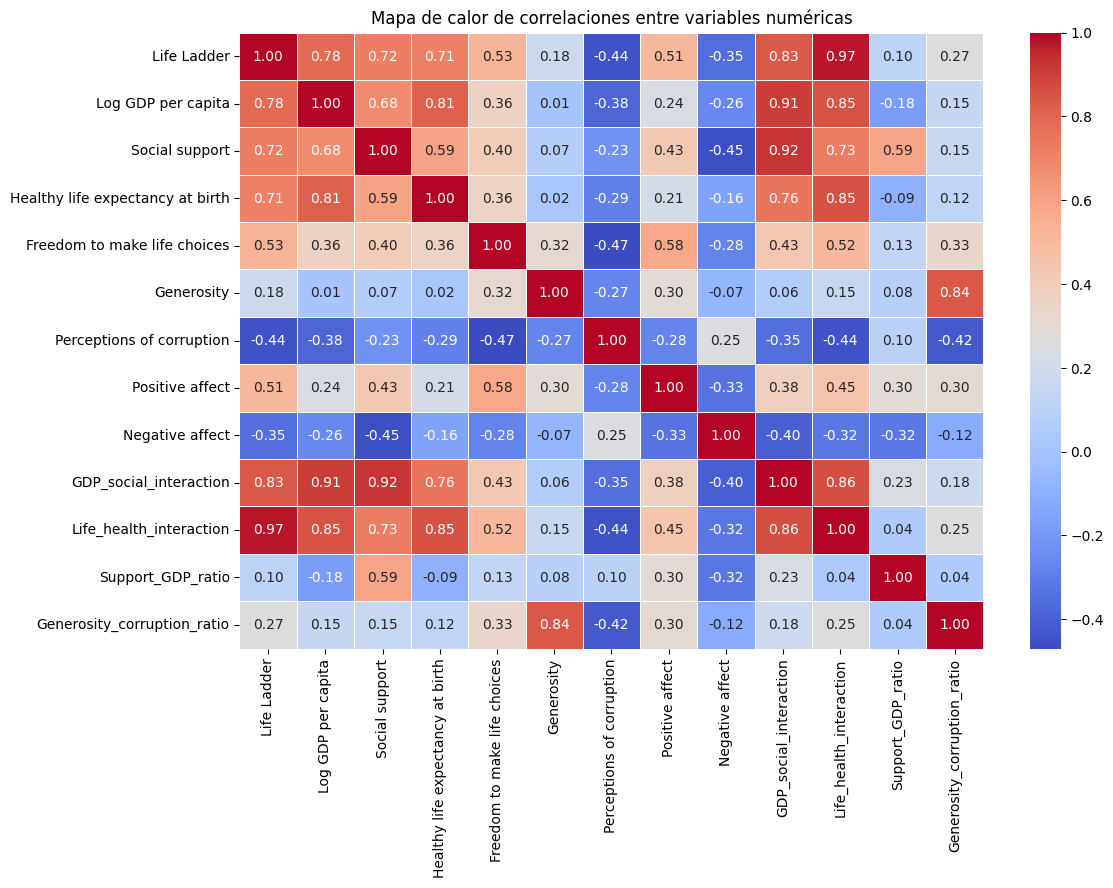

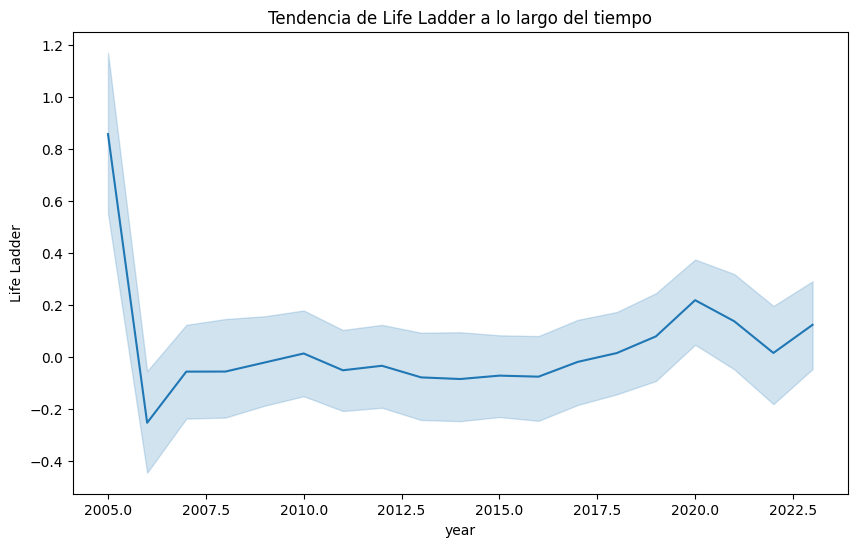

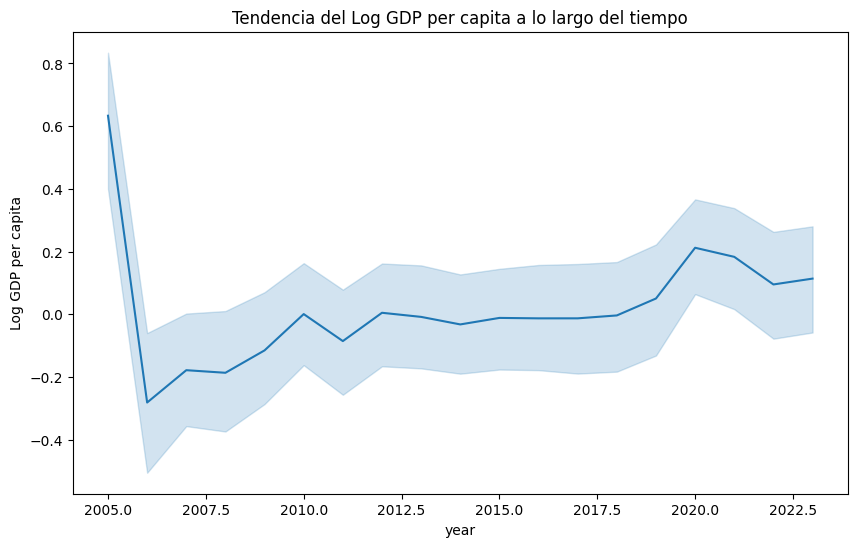

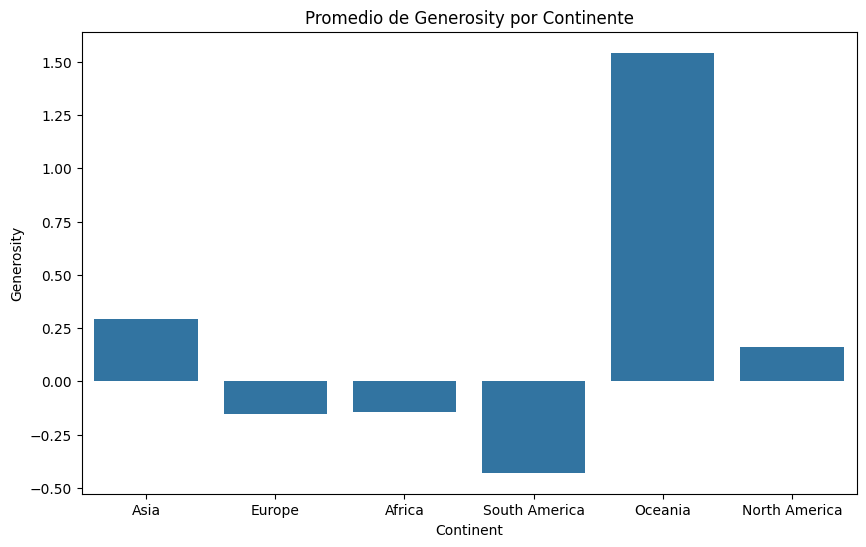

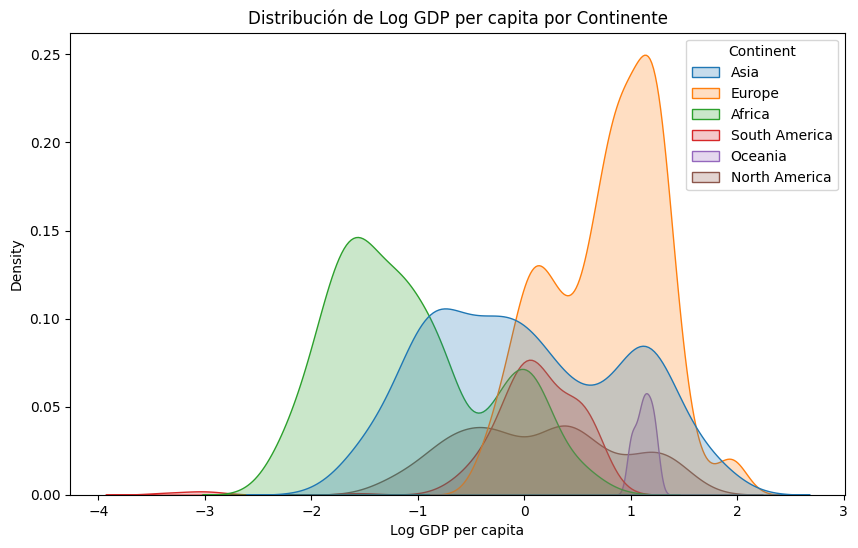

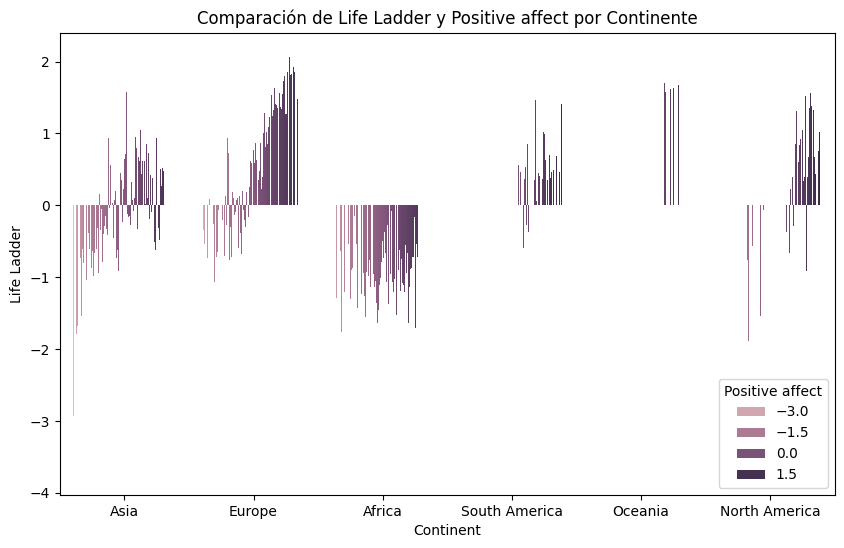

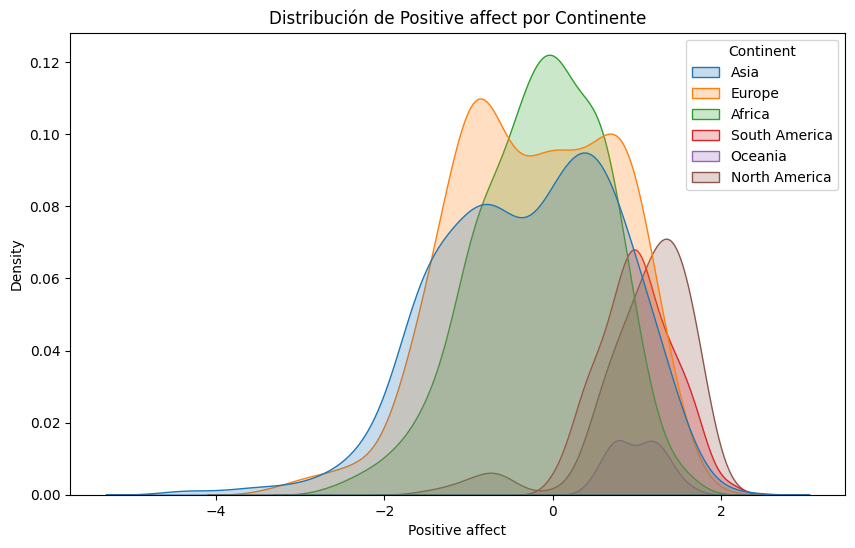

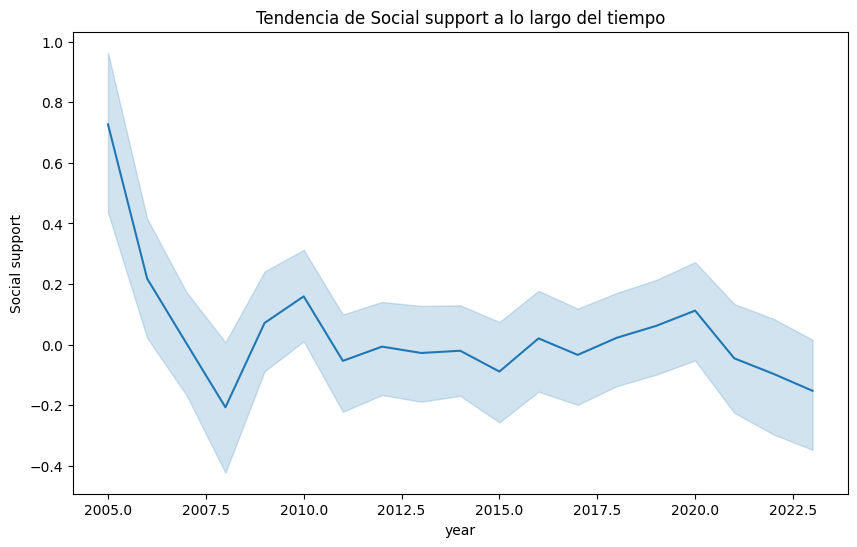

In [60]:
#### SE MUESTRA UNA SERIE DE GRÁFICOS PARA CONOCER EL COMPORTAMIENTO DE LAS VARIABLES ESTANDARIZADAS ###

# Cargar el dataset estandarizado
df_cleaned = df_standarized

# Seleccionar las columnas numéricas excluyendo "year"
cols_num = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# 1. Mostrar distribución de los datos estandarizados
# Establecer el número de filas y columnas (7 filas, 2 columnas)
nrows = 4
ncols = 4

# Crear la figura con 4 filas y 4 columnas
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17, 4 * nrows))
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio entre gráficos

# Recorrer las variables numéricas y graficar cada histograma
for i, col in enumerate(cols_num):
    row = i // ncols  # Índice de la fila
    col_idx = i % ncols  # Índice de la columna
    sns.histplot(df_cleaned[col], kde=True, ax=ax[row, col_idx])  # Histogramas con curva de densidad (KDE)
    ax[row, col_idx].set_title(f'Distribución de {col}')

# Eliminar cualquier gráfico vacío si hay menos de 14 variables
if len(cols_num) < nrows * ncols:
    for i in range(len(cols_num), nrows * ncols):
        fig.delaxes(ax.flatten()[i])

# Mostrar el gráfico
plt.show()


# 3. Mapa de calor para visualizar las correlaciones entre las variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[cols_num].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

# 4. Análisis temporal: Cambios de "Life Ladder" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='year', y='Life Ladder')
plt.title('Tendencia de Life Ladder a lo largo del tiempo')
plt.show()

# 5. Análisis temporal: Cambios de "Log GDP per capita" a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='year', y='Log GDP per capita')
plt.title('Tendencia del Log GDP per capita a lo largo del tiempo')
plt.show()

# 6. Gráfico de barras para Generosity por continente
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Generosity', data=df_cleaned, estimator='mean', ci=None)
plt.title('Promedio de Generosity por Continente')
plt.show()

# 7. Gráfico de densidad (KDE Plot) para Log GDP per capita por continente
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='Log GDP per capita', hue='Continent', fill=True)
plt.title('Distribución de Log GDP per capita por Continente')
plt.show()

# 8. Gráfico de barras apilado de Life Ladder y Positive affect por continente
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Life Ladder', hue='Positive affect', data=df_cleaned, ci=None)
plt.title('Comparación de Life Ladder y Positive affect por Continente')
plt.show()

# 9. Gráfico de densidad para Positive affect por continente
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='Positive affect', hue='Continent', fill=True)
plt.title('Distribución de Positive affect por Continente')
plt.show()

# 10. Gráfico de línea: Tendencia de Social Support a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='year', y='Social support')
plt.title('Tendencia de Social support a lo largo del tiempo')
plt.show()

In [61]:
# Mostrar los valores únicos en las columnas 'Continent', 'Country name' y 'year'
continent_values = df_heatmap['Continent'].unique() if 'Continent' in df_heatmap.columns else "No 'continent' column found"
country_values = df_heatmap['Country name'].unique() if 'Country name' in df_heatmap.columns else "No 'Country name' column found"
year_values = df_heatmap['year'].unique() if 'year' in df_heatmap.columns else "No 'year' column found"

continent_values, country_values, year_values

(array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
        'North America'], dtype=object),
 array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
        'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
        'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
        'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
        'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
        'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
        'Hong Kong S.A.R. of China', 'Hungary', 'Iceland',

In [62]:
# Seleccionamos solo las variables numéricas originales para trabajar esta nueva visualización, y quitamos el año (year)
columnas_deseadas = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
df_numeric = df_heatmap[columnas_deseadas]
df_numeric.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


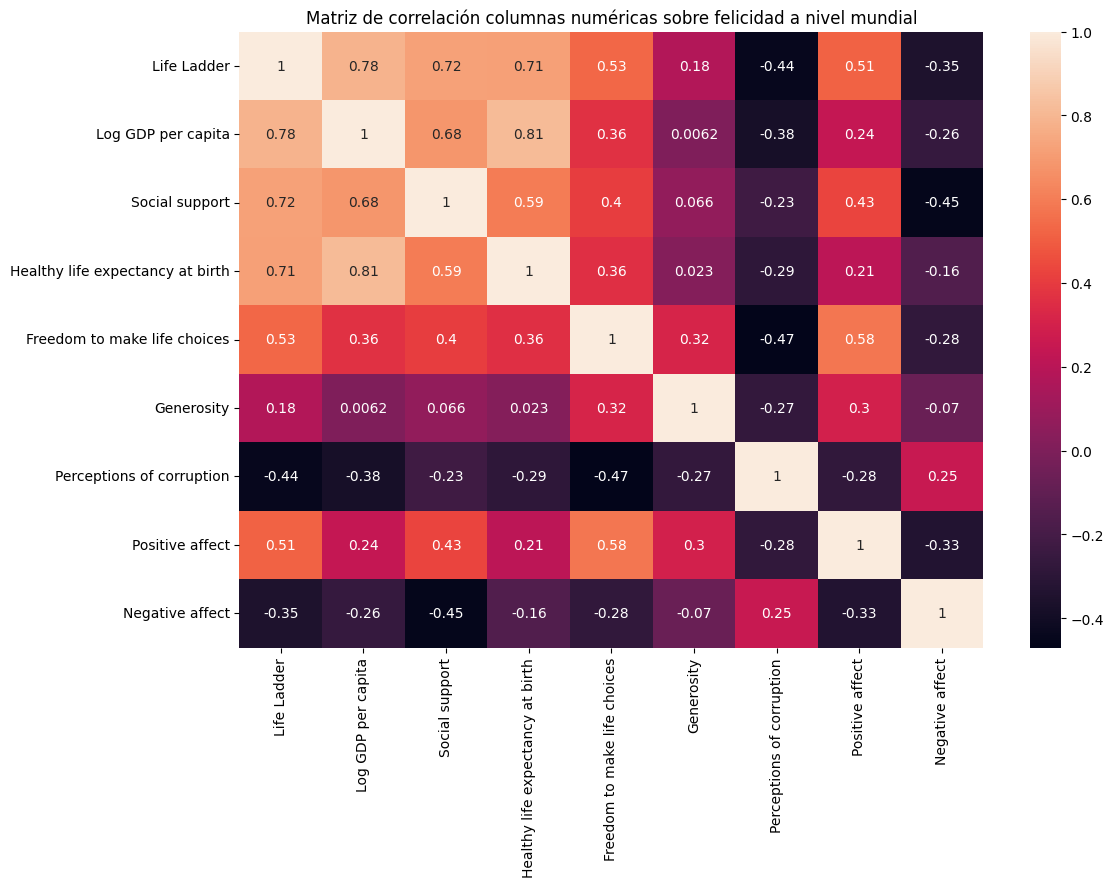

In [63]:
# Previsualizaciones de Heatmap

# Calcular matiz de correlación
correlation_matrix = df_numeric.corr(numeric_only=True)

# Ajustar tamaño del gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar el heatmap
sns.heatmap(correlation_matrix, ax=ax, annot=True)
plt.title("Matriz de correlación columnas numéricas sobre felicidad a nivel mundial")
plt.show()


**Observaciones:**

- A nivel mundial, la Satisfacción de la Vida (`Life Ladder`) presenta mayor correlación con las variables: PIB per cápita (`Log GRP per capita`) con un 0.78, el Apoyo Social (`Social support`) con un 0.72, la Esperanza de Vida saludable al nacer (`Healthy life expectancy at birth`) con un 0.71, y también, la Libertad de Elección (`Freedom to make life choices`) con un 0.53. Podríamos inferir que estas 4 variables contibuyen de forma positiva en la Satisfacción de vida de las personas.
- Por otro lado, la variable Percepción sobre la Corrupción (`Perceptions of corruption`) tiene una correlación de -0.44 respecto a la Satisfacción de la vida; mientras que el Afecto Negativo (`Negative affect`) tiene una correlación de -0.35. Podemos inferir que estas variables provocan una disminución respecto a la medida de Satisfacción de la Vida en las personas.

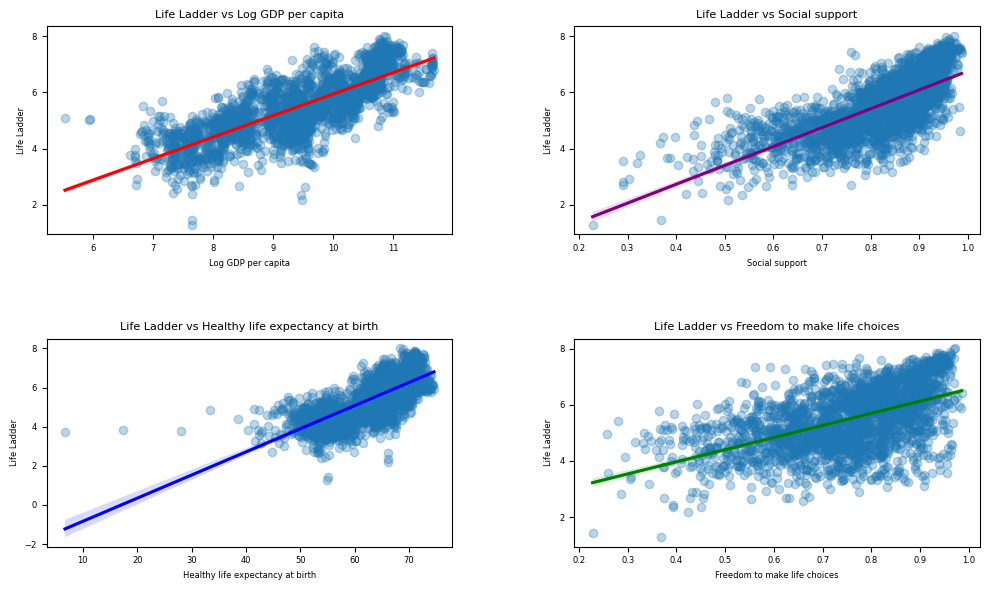

In [64]:
# ---- REFLEJAMOS LA RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO POSITIVO SOBRE LIFE LADDER, SEGÚN INFORMACIÓN ENTREGADA POR EL HEATMAP ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Parámetros personalizables
titulo_size = 8
ejes_size = 6
ticks_size = 6

# Subplot 1: Life Ladder vs Log GDP per capita
plt.subplot(2, 2, 1)  # Primera fila, primera columna
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Log GDP per capita', fontsize=titulo_size)
plt.xlabel('Log GDP per capita', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Subplot 2: Life Ladder vs Social support
plt.subplot(2, 2, 2)  # Primera fila, segunda columna
sns.regplot(x='Social support', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Social support', fontsize=titulo_size)
plt.xlabel('Social support', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Subplot 3: Life Ladder vs Healthy life expectancy at birth
plt.subplot(2, 2, 3)  # Segunda fila, primera columna
sns.regplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'blue'})
plt.title('Life Ladder vs Healthy life expectancy at birth', fontsize=titulo_size)
plt.xlabel('Healthy life expectancy at birth', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Subplot 4: Life Ladder vs Freedom to make life choices
plt.subplot(2, 2, 4)  # Segunda fila, segunda columna
sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'marker': 'o'}, line_kws={'color': 'green'})
plt.title('Life Ladder vs Freedom to make life choices', fontsize=titulo_size)
plt.xlabel('Freedom to make life choices', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Incrementa el espacio entre los gráficos

# Mostrar la gráfica
plt.show()

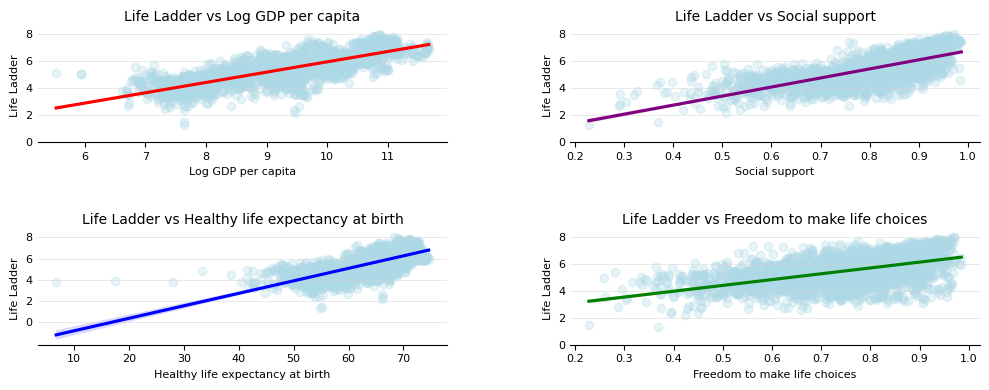

In [65]:
# ---- REFLEJAMOS LA RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO POSITIVO SOBRE LIFE LADDER, SEGÚN INFORMACIÓN ENTREGADA POR EL HEATMAP ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Parámetros personalizables
titulo_size = 10
ejes_size = 8
ticks_size = 8
bubble_color = 'lightblue'  # Color editable de las burbujas

# Subplot 1: Life Ladder vs Log GDP per capita
plt.subplot(2, 2, 1)  # Primera fila, primera columna
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Log GDP per capita', fontsize=titulo_size)
plt.xlabel('Log GDP per capita', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Subplot 2: Life Ladder vs Social support
plt.subplot(2, 2, 2)  # Primera fila, segunda columna
sns.regplot(x='Social support', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Social support', fontsize=titulo_size)
plt.xlabel('Social support', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Subplot 3: Life Ladder vs Healthy life expectancy at birth
plt.subplot(2, 2, 3)  # Segunda fila, primera columna
sns.regplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'blue'})
plt.title('Life Ladder vs Healthy life expectancy at birth', fontsize=titulo_size)
plt.xlabel('Healthy life expectancy at birth', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Subplot 4: Life Ladder vs Freedom to make life choices
plt.subplot(2, 2, 4)  # Segunda fila, segunda columna
sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'green'})
plt.title('Life Ladder vs Freedom to make life choices', fontsize=titulo_size)
plt.xlabel('Freedom to make life choices', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)


# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.8)

# Mostrar la gráfica
plt.show()

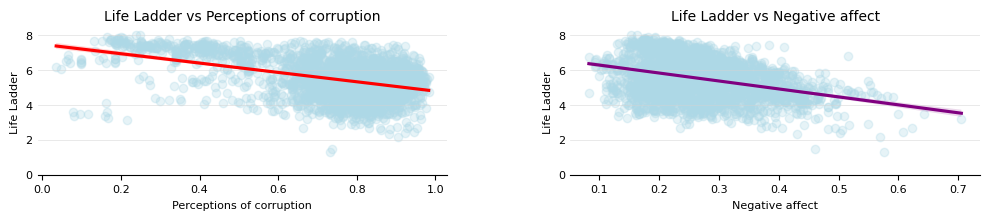

In [66]:
# ---- REFLEJAR RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO NEGATIVO SOBRE LIFE LADDER ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Parámetros personalizables
titulo_size = 10
ejes_size = 8
ticks_size = 8
bubble_color = 'lightblue'  # Color editable de las burbujas

# Subplot 1: Life Ladder vs Perceptions of corruption
plt.subplot(2, 2, 1)  # Primera fila, primera columna
sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Perceptions of corruption', fontsize=titulo_size)
plt.xlabel('Perceptions of corruption', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Subplot 2: Life Ladder vs Negative affect
plt.subplot(2, 2, 2)  # Primera fila, segunda columna (disposición 2x2)
sns.regplot(x='Negative affect', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Negative affect', fontsize=titulo_size)
plt.xlabel('Negative affect', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Ajuste del espacio entre gráficos

# Mostrar la gráfica
plt.show()


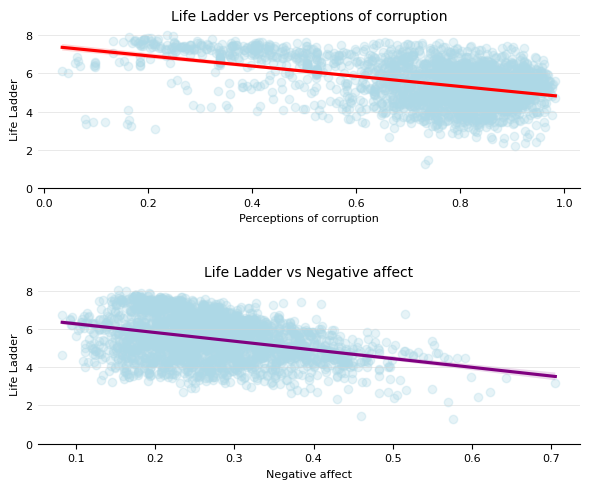

In [67]:
# ---- REFLEJAR RELACIÓN ENTRE VARIABLES QUE TIENEN UN IMPACTO NEGATIVO SOBRE LIFE LADDER ----

# Establecer el tamaño del gráfico
plt.figure(figsize=(6, 5))

# Parámetros personalizables
titulo_size = 10
ejes_size = 8
ticks_size = 8
bubble_color = 'lightblue'  # Color editable de las burbujas

# Subplot 1: Life Ladder vs Perceptions of corruption
plt.subplot(2, 1, 1)  # Primera fila, primer gráfico (disposición 2x1)
sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'red'})
plt.title('Life Ladder vs Perceptions of corruption', fontsize=titulo_size)
plt.xlabel('Perceptions of corruption', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Subplot 2: Life Ladder vs Negative affect
plt.subplot(2, 1, 2)  # Segunda fila, segundo gráfico (disposición 2x1)
sns.regplot(x='Negative affect', y='Life Ladder', data=df_numeric,
            scatter_kws={'alpha': 0.3, 'color': bubble_color, 'marker': 'o'}, line_kws={'color': 'purple'})
plt.title('Life Ladder vs Negative affect', fontsize=titulo_size)
plt.xlabel('Negative affect', fontsize=ejes_size)
plt.ylabel('Life Ladder', fontsize=ejes_size)
plt.xticks(fontsize=ticks_size)
plt.yticks(ticks=range(0, 9, 2), fontsize=ticks_size)  # Ajustar el eje Y para que tenga ticks de 2 en 2

# Eliminar los ticks del eje Y
plt.tick_params(axis='y', length=0)

# Agregar líneas de fondo grises y ajustar su estilo
plt.grid(True, which='both', axis ='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)

# Eliminar las líneas negras de los ejes (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Ajustar el espacio entre los gráficos
plt.subplots_adjust(wspace=0.5, hspace=0.6)  # Ajuste del espacio entre gráficos

# Mostrar la gráfica
plt.show()

In [68]:
# Definir función para rotar de ejes

def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, correlation_matrix.shape[0],0, correlation_matrix.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1)
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

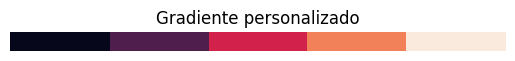

In [69]:
# Definir paleta de colores para heatmap

colores_personalizados = ['#06071b', '#07081f', '#1d122d', '#30183b', '#431c46','#491e4a','#682056',
                          '#891d5b','#a41a5b','#b91658','#c81952','#dc2b47','#e43840','#e8403c','#f36e4b',
                          '#f2704c','#f3865d','#f6ab82','#f7b48f','#f6bc99','#f9e0cd','#faeadd']  # Gradiente de color oscuro a claro

# Paleta de colores personalizado a partir de la lista de colores
mi_paleta = LinearSegmentedColormap.from_list("mi_paleta", colores_personalizados, N=5)

# Crear un gradiente lineal
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))  # Se apila para que el gradiente sea continuo

# Mostrar la imagen del gradiente
plt.imshow(gradient, aspect=5, cmap=mi_paleta)  # Cambia el aspecto para hacerlo más angosto
plt.title('Gradiente personalizado')
plt.axis('off')  # Ocultar los ejes
plt.show()

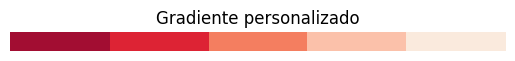

In [70]:
# Definir nueva paleta de colores para heatmap

colores_personalizados_2 = ['#a20d32','#ee2e3e','#d71634','#ef4d35','#f36f51','#f68d6f','#f8a98e','#fcc9b4','#fde2d6','#faeadd']  # Gradiente de color oscuro a claro

# Paleta de colores personalizado a partir de la lista de colores
mi_paleta_2 = LinearSegmentedColormap.from_list("mi_paleta_2", colores_personalizados_2, N=5)

# Crear un gradiente lineal
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))  # Se apila para que el gradiente sea continuo

# Mostrar la imagen del gradiente
plt.imshow(gradient, aspect=5, cmap=mi_paleta_2)  # Cambia el aspecto para hacerlo más angosto
plt.title('Gradiente personalizado')
plt.axis('off')  # Ocultar los ejes
plt.show()

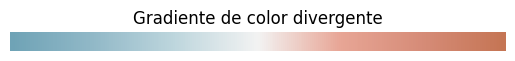

In [71]:
# Definir nueva paleta de colores divergente
#colores_divergentes = ['#a20d32', '#d71634', '#ee2e3e', '#ef4d35', '#f36f51','#f68d6f', '#f8a98e', '#fcc9b4', '#fde2d6', '#faeadd']
#colores_divergentes = ['#a20d32', '#d71634', '#ee2e3e', '#ef4d35', '#f36f51', '#fcc9b4', '#fde2d6', '#faeadd','#D3D3D3','#A1D6F9','#6FAFE9','#4A90E2']
#colores_divergentes = ['#a20d32','#C75A5A','#F9DCD0', '#D9F1F4', '#A3D5E3', '#75B4D3', '#5392C1']
#colores_divergentes =  ['#C98B99', '#E4B7C0', '#F5E1E8', '#C6E7EC', '#A5D5DE', '#89B8C6']
#colores_divergentes = ['#a20d32','#d71634','#ee2e3e','#fde2d6', '#faeadd','#fcc9b4','#f8a98e','#f36f51','#ef4d35']
#colores_divergentes = ['#4A90E2', '#6FAFE9', '#A1D6F9', '#D3D3D3', '#F6D4C2', '#F4A482', '#F47362', '#E6492D']
#colores_divergentes = ['#D6A564', '#EBC68A', '#F2D8A6', '#F9EAD2', '#FFFFFF', '#C8E8E5', '#B4DAD2', '#7BB0A6', '#56968C']
#colores_divergentes = ['#6FA3B6', '#92B9C8', '#BFD7DE', '#F3F3F3', '#F2C7BD', '#E8A696', '#D68C78', '#C57554']
colores_divergentes = ['#6FA3B6', '#92B9C8', '#BFD7DE', '#F3F3F3', '#E8A696', '#D68C78', '#C57554']
#colores_divergentes = ['#C7D7B4', '#A9C49B', '#8FB68B', '#7BAC7B', '#669E6D', '#4F8C75', '#4C6D83', '#40587A']
#colores_divergentes = ['#154B3D', '#357C63', '#7EB7A0', '#F0EDED', '#C49AC5', '#7C5089', '#532A61']
#colores_divergentes = ['#ef8a62','#f7f7f7','#67a9cf']

# Paleta de colores personalizada a partir de la lista de colores (N es la cantidad de divisiones de la paleta)
mi_paleta_divergente = LinearSegmentedColormap.from_list("mi_paleta_divergente", colores_divergentes, N=256)

# Crear un gradiente lineal que va de -1 a 1 para simular datos con valores tanto negativos como positivos
gradient = np.linspace(-1, 1, 256)  # Los valores van de -1 a 1 (donde 0 es el punto medio)
gradient = np.vstack((gradient, gradient))  # Se apila para que el gradiente sea continuo

# Mostrar la imagen del gradiente con la nueva paleta divergente
plt.imshow(gradient, aspect=5, cmap=mi_paleta_divergente)  # Usa la nueva paleta
plt.title('Gradiente de color divergente')
plt.axis('off')  # Ocultar los ejes
plt.show()
    

#### **VISUALIZACIÓN FINAL**

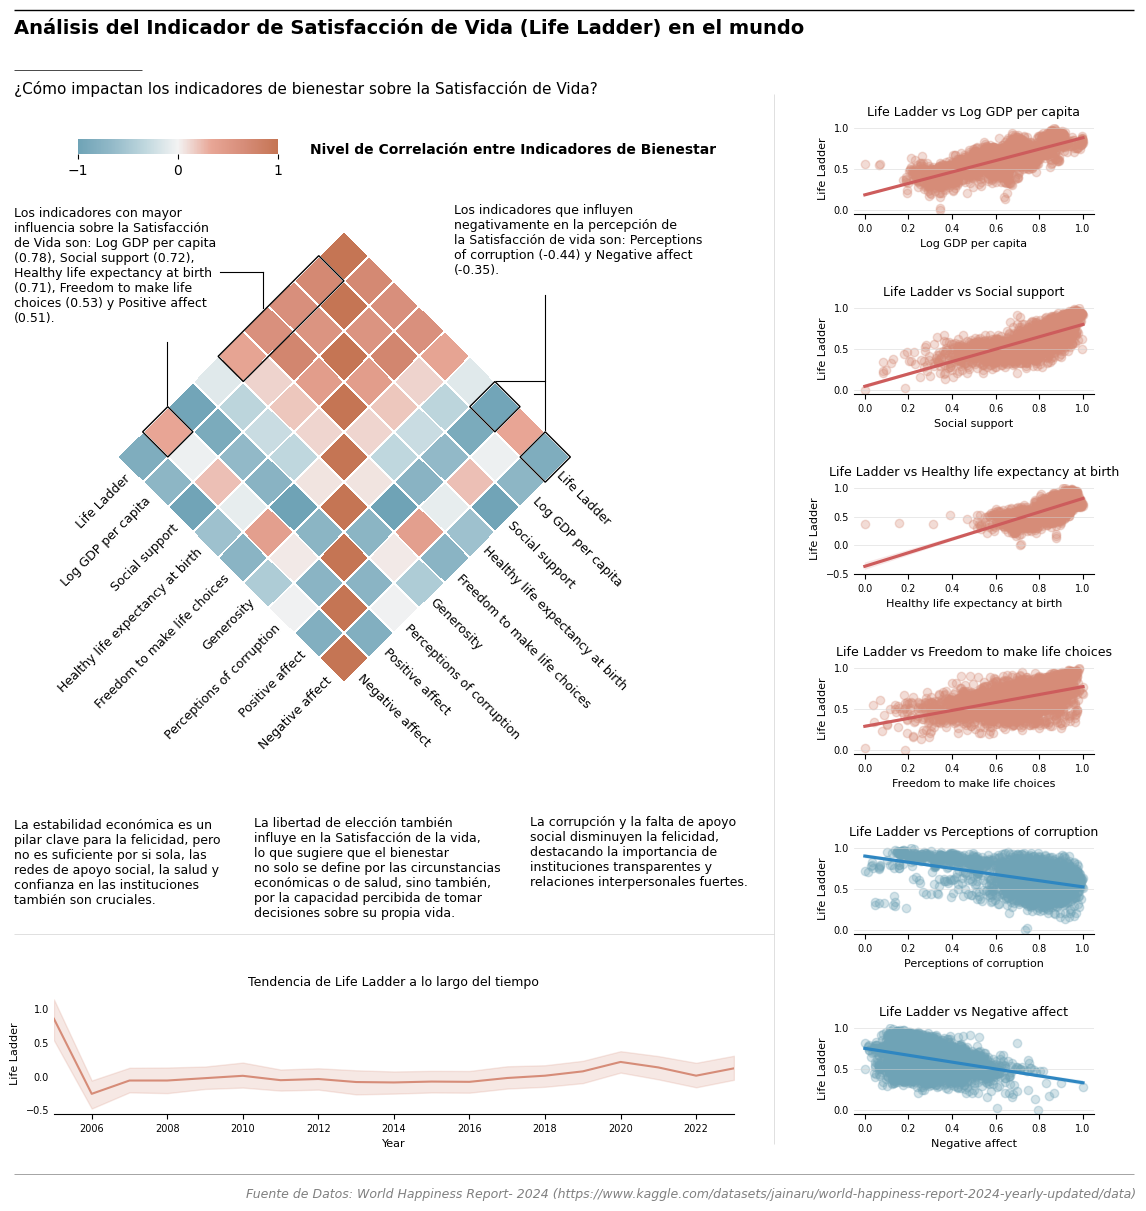

In [72]:
# Previsualizaciones de Heatmap rotado

# Calcular matiz de correlación
correlation_matrix = df_numeric.corr(numeric_only=True)

# Ajustar tamaño del gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax0 = rotate_axes(fig, 111, -135)

# Dibujar el heatmap 
sns.heatmap(correlation_matrix, annot=False, cmap=mi_paleta_divergente, ax=ax0, linewidths=0.2, cbar=False)


# ---- Añadir etiquetas a los ejes del heatmap ----

plt.text(-7.4, -8.4, 'Life Ladder', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-7.8, -10.0, 'Log GDP per capita', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-6.4, -10.15, 'Social support', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-7.9, -13.0, 'Healthy life expectancy at birth', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-6.85, -13.45, 'Freedom to make life choices', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-3.85, -11.8, 'Generosity', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-4.9, -14.3, 'Perceptions of corruption', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-2.8, -13.71, 'Positive affect', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(-2.26, -14.6, 'Negative affect', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)

plt.text(0.36, -12.6, 'Negative affect', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(1.1, -11.88, 'Positive affect', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(1.7, -11.2, 'Perceptions of corruption', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(2.4, -10.45, 'Generosity', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(3.15, -9.8, 'Freedom to make life choices', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(3.87, -9.0, 'Healthy life expectancy at birth', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(4.6, -8.3, 'Social support', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(5.28, -7.62, 'Log GDP per capita', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)
plt.text(5.95, -6.9, 'Life Ladder', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True, fontsize=9)


# ---- Añadir Titulo, Subtítulo, Líneas -----

# Título principal
plt.text(0.1, 1.2, "Análisis del Indicador de Satisfacción de Vida (Life Ladder) en el mundo", 
     fontsize=14, fontweight='bold', ha='left', transform=fig.transFigure)
    
# Insertar la línea sobre el título
fig.add_artist(
    plt.Line2D([0.1, 1.5], [1.24, 1.24], lw=1, color="black", solid_capstyle="butt", transform=fig.transFigure)
)

# Subtítulo
plt.text(x=0.1, y=1.1, s="¿Cómo impactan los indicadores de bienestar sobre la Satisfacción de Vida?", 
         fontsize=11, fontweight='normal', ha='left', transform=fig.transFigure)

# Insertar Línea corta sobre el subtítulo
fig.add_artist(
    plt.Line2D([0.1, 0.26], [1.14, 1.14], lw=0.5, color="black", solid_capstyle="butt", transform=fig.transFigure)
)

# ----- Incorporar Gradiente de Colores sobre Heatmap ----

# Crear un eje separado para la barra de color en la parte superior derecha
cbar_ax = fig.add_axes([0.18, 1.0, 0.25, 0.025])  # [left, bottom, width, height]

# Generar la barra de color en el eje separado
sm = plt.cm.ScalarMappable(cmap=mi_paleta_divergente, norm=plt.Normalize(vmin=-1, vmax=1))
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', ticks=[-1.0,0.0, 1.0])

# Eliminar el contorno de la barra de color
cbar.outline.set_visible(False)

# Mover los ticks más hacia el centro (interior) de la barra
cbar.ax.tick_params(axis='x', which='both', direction='out')  # Ticks hacia adentro de la barra

# Añadir título de la barra de color
plt.text(0.47, 1.0, 'Nivel de Correlación entre Indicadores de Bienestar ', fontsize=10, fontweight='bold', ha='left', transform=fig.transFigure)  # Negrita


# ---- Añadir Gráficos de Regresión encima del Heatmap ----

# Gráfico 1: Life Ladder vs Log GDP per capita
reg_ax1 = fig.add_axes([1.15, 0.9, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#D68C78', 'marker': 'o'}, line_kws={'color': '#CD5C5C'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Log GDP per capita', fontsize=9)
reg_ax1.set_xlabel('Log GDP per capita', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 2: Life Ladder vs Social support
reg_ax1 = fig.add_axes([1.15, 0.6, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Social support', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#D68C78', 'marker': 'o'}, line_kws={'color': '#CD5C5C'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Social support', fontsize=9)
reg_ax1.set_xlabel('Social support', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 3: Life Ladder vs Healthy life expectancy at birth
reg_ax1 = fig.add_axes([1.15, 0.3, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#D68C78', 'marker': 'o'}, line_kws={'color': '#CD5C5C'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Healthy life expectancy at birth', fontsize=9)
reg_ax1.set_xlabel('Healthy life expectancy at birth', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 4: Life Ladder vs Freedom to make life choices
reg_ax1 = fig.add_axes([1.15, 0.0, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Freedom to make life choices', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#D68C78', 'marker': 'o'}, line_kws={'color': '#CD5C5C'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Freedom to make life choices', fontsize=9)
reg_ax1.set_xlabel('Freedom to make life choices', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 5: Life Ladder vs Perceptions of corruption
reg_ax1 = fig.add_axes([1.15, -0.3, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Perceptions of corruption', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#6FA3B6', 'marker': 'o'}, line_kws={'color': '#2e86c1'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Perceptions of corruption', fontsize=9)
reg_ax1.set_xlabel('Perceptions of corruption', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# Gráfico 6: Life Ladder vs Negative affect
reg_ax1 = fig.add_axes([1.15, -0.6, 0.3, 0.15])  # Posicionar gráfico en coordenadas específicas
sns.regplot(x='Negative affect', y='Life Ladder', data=df, scatter_kws={'alpha': 0.3, 'color': '#6FA3B6', 'marker': 'o'}, line_kws={'color': '#2e86c1'}, ax=reg_ax1)
reg_ax1.set_title('Life Ladder vs Negative affect', fontsize=9)
reg_ax1.set_xlabel('Negative affect', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)


# ---- Añadir gráfico de lineas para representar tendencia de Life Ladder a lo largo de los años ----

min_year = df_cleaned['year'].min()
max_year = df_cleaned['year'].max()
reg_ax1 = fig.add_axes([0.15, -0.6, 0.85, 0.2])  # Posicionar gráfico en coordenadas específicas
sns.lineplot(x='year', y='Life Ladder', data=df_cleaned, ax=reg_ax1, color='#D68C78')
reg_ax1.set_xlim(min_year, max_year)
reg_ax1.set_title('Tendencia de Life Ladder a lo largo del tiempo', fontsize=9)
reg_ax1.set_xlabel('Year', fontsize=8)
reg_ax1.set_ylabel('Life Ladder', fontsize=8)
reg_ax1.tick_params(labelsize=7)
reg_ax1.tick_params(axis='y', length=0)
reg_ax1.spines['top'].set_visible(False)
reg_ax1.spines['right'].set_visible(False)
reg_ax1.spines['left'].set_visible(False)
reg_ax1.spines['bottom'].set_visible(True)

# ---- Añadir rectángulos y líneas para destacar información ----

# Lado izquierdo
ax0.add_patch(Rectangle((1, 0), 4, 1, fill=None, alpha=1))
ax0.add_patch(Rectangle((7, 0), 1, 1, fill=None, alpha=1))
ax.axvline(0.37, 0.9, 0.7, color = 'black', linewidth=0.8)
ax.axvline(0.215, 0.75, 0.6, color = 'black', linewidth=0.8)
ax.axhline(0.9, 0.3, 0.37, color = 'black', linewidth=0.8 )

# Lado derecho
ax0.add_patch(Rectangle((0, 6), 1, 1, fill=None, alpha=1))
ax0.add_patch(Rectangle((0, 8), 1, 1, fill=None, alpha=1))
ax.axvline(0.824, 0.85, 0.55, color = 'black', linewidth=0.8)
ax.axhline(0.665, 0.74, 0.824, color = 'black', linewidth=0.8 )

# ---- Texto descriptivo Heatmap ----

plt.text(0.1, 0.72, 'Los indicadores con mayor \ninfluencia sobre la Satisfacción \nde Vida son: Log GDP per capita \n(0.78), Social support (0.72), \nHealthy life expectancy at birth \n(0.71), Freedom to make life \nchoices (0.53) y Positive affect \n(0.51).', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita
plt.text(0.65, 0.8, 'Los indicadores que influyen \nnegativamente en la percepción de \nla Satisfacción de vida son: Perceptions \nof corruption (-0.44) y Negative affect \n(-0.35).', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita

# ---- Texto conslusiones Heatmap ----

plt.text(0.1, -0.25, 'La estabilidad económica es un \npilar clave para la felicidad, pero \nno es suficiente por si sola, las \nredes de apoyo social, la salud y \nconfianza en las instituciones \ntambién son cruciales.', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita
plt.text(0.4, -0.272, 'La libertad de elección también \ninfluye en la Satisfacción de la vida, \nlo que sugiere que el bienestar \nno solo se define por las circunstancias\neconómicas o de salud, sino también, \npor la capacidad percibida de tomar \ndecisiones sobre su propia vida.', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita
plt.text(0.745, -0.22, 'La corrupción y la falta de apoyo \nsocial disminuyen la felicidad, \ndestacando la importancia de \ninstituciones transparentes y \nrelaciones interpersonales fuertes.', fontsize=9, fontweight=False, ha='left', transform=fig.transFigure)  # Negrita

# ---- Ajustes linea inferior ----

plt.text(x=0.39, y=-0.74, s="Fuente de Datos: World Happiness Report- 2024 (https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated/data)", 
         fontsize=9, color='gray', style='italic', ha='left', transform=fig.transFigure)

# Insertar una línea sobre datos del pie de página
fig.add_artist(plt.Line2D([0.1, 1.5], [- 0.7, -0.7], lw=0.5, color="grey", solid_capstyle="butt", transform=fig.transFigure))


# ---- Lineas divisorias  --

fig.add_artist(plt.Line2D([1.05, 1.05], [- 0.65, 1.1], lw=0.5, color="lightgray", solid_capstyle="butt", transform=fig.transFigure))
fig.add_artist(plt.Line2D([0.1, 1.05], [- 0.3, -0.3], lw=0.5, color="lightgray", solid_capstyle="butt", transform=fig.transFigure))


# ----- Configuraciones Extras ------

ax.set_axis_off()

# Mostrar gráfico
plt.show()